In [1]:
import pandas as pd

link='https://drive.google.com/file/d/1My1EuNerazr-WNU4mrdwvaxRwul9AyTR/view?usp=sharing'
path='https://drive.google.com/uc?id=' + link.split('/')[-2]
df = pd.read_csv(path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [3]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [4]:
df.describe(exclude=['float','int'])

,name,orbiting_body,sentry_object,hazardous
count,90836,90836,90836,90836
unique,27423,1,1,2
top,469219 Kamo`oalewa (2016 HO3),Earth,False,False
freq,43,90836,90836,81996


#EDA

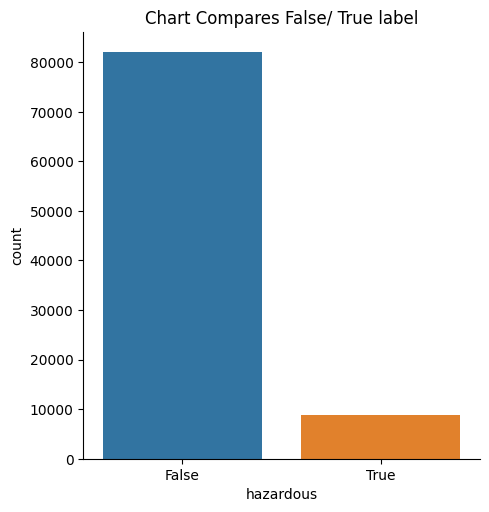

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.catplot(x='hazardous',data=df,kind='count')
plt.title('Chart Compares False/ True label')
plt.show()


<ipython-input-6-2fd705778093>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, ax=axs[i])
<ipython-input-6-2fd705778093>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, ax=axs[i])
<ipython-input-6-2fd705778093>:8: UserWarning: 

`distplot` is a deprecated 

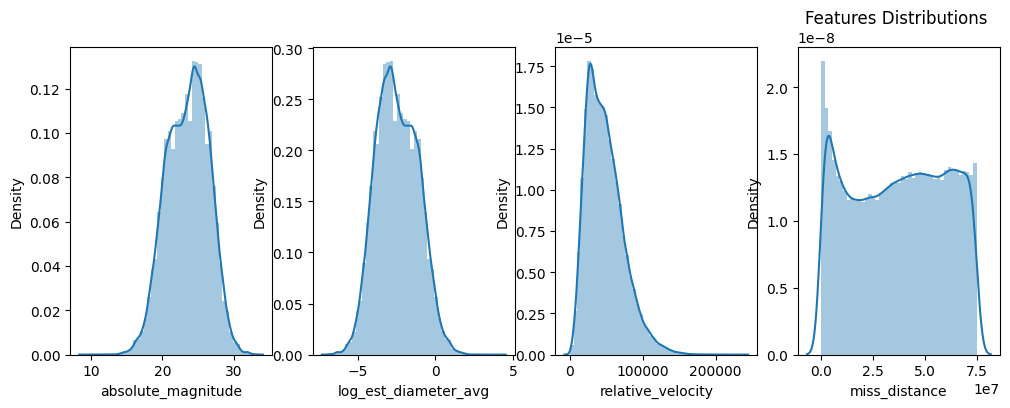

In [6]:
df['est_diameter_avg']=(df['est_diameter_min']+df['est_diameter_max'])/2
df['log_est_diameter_avg']=np.log(df['est_diameter_avg'])
col_name=['absolute_magnitude','log_est_diameter_avg','relative_velocity','miss_distance']

fig, axs = plt.subplots(ncols=4, figsize=(12, 4))

for i, col in enumerate(col_name):
    sns.distplot(df[col], kde=True, ax=axs[i])
plt.title('Features Distributions ')
plt.show()

<ipython-input-7-39b5000aaeb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


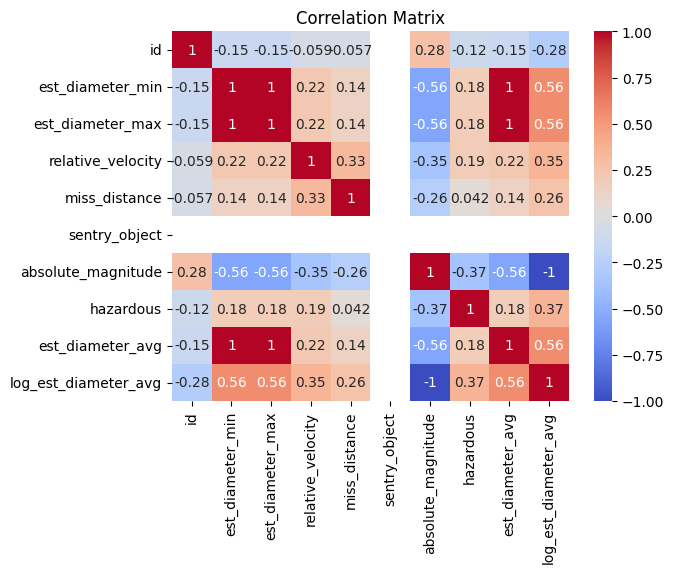

In [7]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation Matrix')
plt.show()

#PREPROCESSING

In [8]:
df.drop(columns=['id','name','orbiting_body','sentry_object'],inplace=True)

In [9]:
df.isnull().sum()


est_diameter_min        0
est_diameter_max        0
relative_velocity       0
miss_distance           0
absolute_magnitude      0
hazardous               0
est_diameter_avg        0
log_est_diameter_avg    0
dtype: int64

In [10]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

7


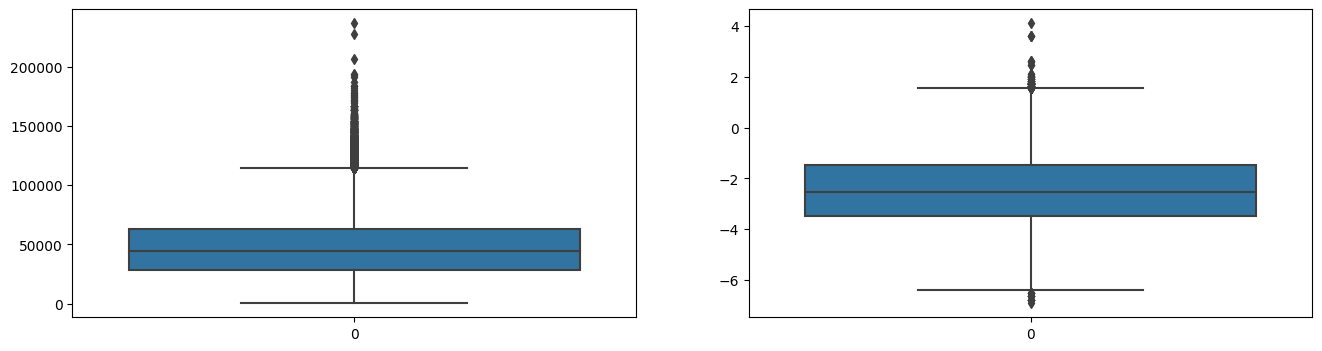

In [11]:
col_name=['relative_velocity','log_est_diameter_avg']
fig, axs=plt.subplots(ncols=2,figsize=(16,4))

for i, col in enumerate(col_name):

  sns.boxplot(df[col], ax=axs[i])



plt.show()



In [12]:
print(df['log_est_diameter_avg'].skew(),df['relative_velocity'].skew())


0.13756263225904317 0.905029250613325


In [13]:
percentile_75=df['relative_velocity'].quantile(0.75)
percentile_25=df['relative_velocity'].quantile(0.25)
iqr=percentile_75-percentile_25
upper_limit=percentile_75+1.5*iqr
under_limit=percentile_25-1.5*iqr

In [14]:
df[df['relative_velocity']>upper_limit].count()

est_diameter_min        1573
est_diameter_max        1573
relative_velocity       1573
miss_distance           1573
absolute_magnitude      1573
hazardous               1573
est_diameter_avg        1573
log_est_diameter_avg    1573
dtype: int64

In [15]:
df_new=df[df['relative_velocity']<upper_limit]

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89256 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   est_diameter_min      89256 non-null  float64
 1   est_diameter_max      89256 non-null  float64
 2   relative_velocity     89256 non-null  float64
 3   miss_distance         89256 non-null  float64
 4   absolute_magnitude    89256 non-null  float64
 5   hazardous             89256 non-null  bool   
 6   est_diameter_avg      89256 non-null  float64
 7   log_est_diameter_avg  89256 non-null  float64
dtypes: bool(1), float64(7)
memory usage: 5.5 MB


In [17]:
mean=df_new['log_est_diameter_avg'].mean()
std=df_new['log_est_diameter_avg'].std()
upper_limit=mean+3*std
under_limit=mean-3*std
df_new[(df_new['log_est_diameter_avg']>upper_limit)|(df_new['log_est_diameter_avg']<under_limit)].count()

est_diameter_min        106
est_diameter_max        106
relative_velocity       106
miss_distance           106
absolute_magnitude      106
hazardous               106
est_diameter_avg        106
log_est_diameter_avg    106
dtype: int64

In [18]:
df_new=df_new[(df_new['log_est_diameter_avg']<upper_limit) & (df_new['log_est_diameter_avg']>under_limit)]



In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89150 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   est_diameter_min      89150 non-null  float64
 1   est_diameter_max      89150 non-null  float64
 2   relative_velocity     89150 non-null  float64
 3   miss_distance         89150 non-null  float64
 4   absolute_magnitude    89150 non-null  float64
 5   hazardous             89150 non-null  bool   
 6   est_diameter_avg      89150 non-null  float64
 7   log_est_diameter_avg  89150 non-null  float64
dtypes: bool(1), float64(7)
memory usage: 5.5 MB


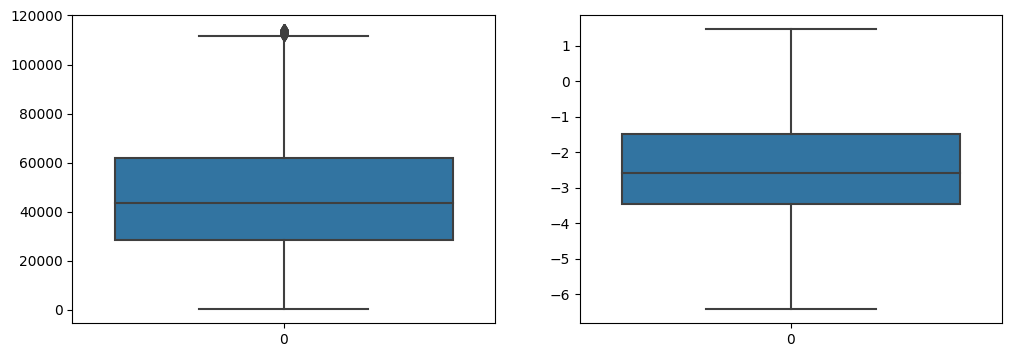

In [20]:
col_name=['relative_velocity','log_est_diameter_avg']
fig, axs=plt.subplots(ncols=2,figsize=(12,4))

for i, col in enumerate(col_name):

  sns.boxplot(df_new[col], ax=axs[i])

plt.show()


#DEFINE FEATURES AND TARGET

In [21]:
X=df_new[['log_est_diameter_avg','relative_velocity']]
y=df_new['hazardous']

#TRAIN TEST SPLIT

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=43,test_size=0.3)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(62405, 2) (62405,) (26745, 2) (26745,)


#SCALE DATA

In [23]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scaler=scaler.transform(X_test)
print(X_train_scale)


[[ 0.89953271 -0.16186935]
 [ 1.46962617  0.48150723]
 [ 0.81775701  0.55558654]
 ...
 [-0.58411215 -0.22554543]
 [-0.44392523 -0.13506041]
 [ 0.98364486  0.42875131]]


#MODELING

In [24]:
from sklearn.metrics import classification_report,roc_auc_score, confusion_matrix, accuracy_score

###LogisticRegression


In [25]:
from sklearn.linear_model import LogisticRegression

model_lg=LogisticRegression()
model_lg.fit(X_train_scale,y_train)
y_pred_test=model_lg.predict(X_test)
score=classification_report(y_test,y_pred_test)
print(score)
roc_auc_score_lg=(y_test,y_pred_test)
acc_lg=accuracy_score(y_test,y_pred_test)

              precision    recall  f1-score   support

       False       0.00      0.00      0.00     24177
        True       0.10      1.00      0.18      2568

    accuracy                           0.10     26745
   macro avg       0.05      0.50      0.09     26745
weighted avg       0.01      0.10      0.02     26745



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

###DecisionTree

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred_test=model_dt.predict(X_test)
score=classification_report(y_test,y_pred_test)
print(score)
roc_auc_score_dt=(y_test,y_pred_test)
acc_dt=accuracy_score(y_test,y_pred_test)

              precision    recall  f1-score   support

       False       0.94      0.94      0.94     24177
        True       0.43      0.43      0.43      2568

    accuracy                           0.89     26745
   macro avg       0.69      0.69      0.69     26745
weighted avg       0.89      0.89      0.89     26745



###RandomForest






In [27]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_pred_test=model_dt.predict(X_test)
score=classification_report(y_test,y_pred_test)
print(score)
roc_auc_score_rf=(y_test,y_pred_test)
acc_rf=accuracy_score(y_test,y_pred_test)

              precision    recall  f1-score   support

       False       0.94      0.94      0.94     24177
        True       0.43      0.43      0.43      2568

    accuracy                           0.89     26745
   macro avg       0.69      0.69      0.69     26745
weighted avg       0.89      0.89      0.89     26745



###XGB

In [28]:
#XGB
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred_test=model_xgb.predict(X_test)
score=classification_report(y_test,y_pred_test)
auc=roc_auc_score(y_test,y_pred_test)
roc_auc_score_xgb=(y_test,y_pred_test)
acc_xgb=accuracy_score(y_test,y_pred_test)
print(score)

              precision    recall  f1-score   support

       False       0.92      0.99      0.95     24177
        True       0.70      0.18      0.29      2568

    accuracy                           0.91     26745
   macro avg       0.81      0.59      0.62     26745
weighted avg       0.90      0.91      0.89     26745



###LGBM

In [29]:
from lightgbm import LGBMClassifier
model_lgbm=LGBMClassifier()
model_lgbm.fit(X_train,y_train)
y_pred_test=model_lgbm.predict(X_test)
y_pred_train=model_lgbm.predict(X_train)
score_test=classification_report(y_test,y_pred_test)
score_train=classification_report(y_train,y_pred_train)
print('test',score_test,'\ntrain',score_train)
roc_auc_score_lgbm=(y_test,y_pred_test)
acc_lgbm=accuracy_score(y_test,y_pred_test)

[LightGBM] [Info] Number of positive: 5806, number of negative: 56599
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 62405, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093037 -> initscore=-2.277099
[LightGBM] [Info] Start training from score -2.277099
test               precision    recall  f1-score   support

       False       0.91      0.99      0.95     24177
        True       0.62      0.09      0.15      2568

    accuracy                           0.91     26745
   macro avg       0.76      0.54      0.55     26745
weighted avg       0.88      0.91      0.87     26745
 
train               precision    recall  f1-score   support

       False       0.92      1.00      0.95     56599
        True       0.76      0.11      0.19      5806

   

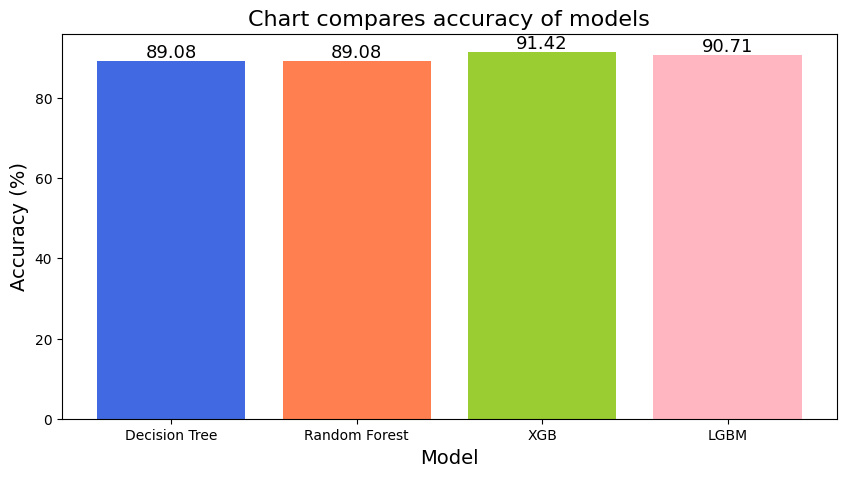

In [30]:
accuracy_score_org = [acc_dt, acc_rf, acc_xgb, acc_lgbm ]
model = ["Decision Tree","Random Forest","XGB","LGBM"]
accuracy_score_org = [round(x * 100,2) for x in accuracy_score_org]

plt.figure(figsize=(10,5))
palette = ['royalblue','coral','yellowgreen','lightpink','goldenrod','rebeccapurple']
plt.bar(model,accuracy_score_org, color = palette)
for i, v in enumerate(accuracy_score_org):
    plt.text(i, v+1, str(v), ha='center', fontsize=13)


plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Chart compares accuracy of models", fontsize=16)
plt.show()

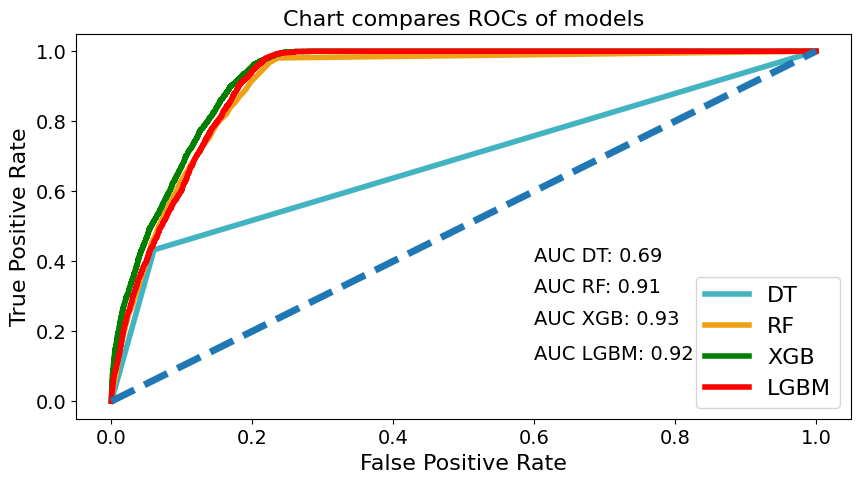

In [31]:
from sklearn.metrics import roc_auc_score,roc_curve
#set up plotting area
#plt.figure(0).clf()
plt.figure(figsize=(10,5))
#Vẽ ROC của mô hình đầu tiên
y_probabilities = model_dt.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='#42b4c1')
plt.text(0.6,0.4,'AUC DT: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 14)
#Vẽ ROC của mô hình thứ 2
y_probabilities_2 = model_rf.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_2)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='#efa115')
plt.text(0.6,0.31,'AUC RF: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_2)),size= 14)
#Vẽ ROC của mô hình thứ 3
y_probabilities_3 = model_xgb.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_3)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='green')
plt.text(0.6,0.22,'AUC XGB: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_3)),size= 14)
#Vẽ ROC của mô hình thứ 4
y_probabilities_4 = model_lgbm.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_4)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
plt.text(0.6,0.12,'AUC LGBM: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_4)),size= 14)

plt.plot([0,1],ls='--',linewidth=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Chart compares ROCs of models', fontsize=16)
plt.legend(['DT', 'RF', 'XGB', 'LGBM'], fontsize=16 )

###Sampling

In [32]:
#Smote
from imblearn.over_sampling import SMOTE
model_sm=SMOTE()
X_sm,y_sm=model_sm.fit_resample(X_train,y_train)
X_sm_scale,y_sm_scale=model_sm.fit_resample(X_train_scale,y_train)

In [33]:
#LogisticRegression
model_lg=LogisticRegression()
model_lg.fit(X_sm_scale,y_sm_scale)
y_pred_test=model_lg.predict(X_test)
score=classification_report(y_test,y_pred_test)
print(score)
acc_lg=accuracy_score(y_test,y_pred_test)

              precision    recall  f1-score   support

       False       0.00      0.00      0.00     24177
        True       0.10      1.00      0.18      2568

    accuracy                           0.10     26745
   macro avg       0.05      0.50      0.09     26745
weighted avg       0.01      0.10      0.02     26745



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [34]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_sm,y_sm)
y_pred_test=model_dt.predict(X_test)
y_pred_train=model_dt.predict(X_sm)
score_test=classification_report(y_test,y_pred_test)
score_train=classification_report(y_sm,y_pred_train)
print('test',score_test,'\ntrain',score_train)
roc_auc_score_dt=(y_test,y_pred_test)
acc_dt=accuracy_score(y_test,y_pred_test)

test               precision    recall  f1-score   support

       False       0.94      0.93      0.94     24177
        True       0.44      0.49      0.46      2568

    accuracy                           0.89     26745
   macro avg       0.69      0.71      0.70     26745
weighted avg       0.90      0.89      0.89     26745
 
train               precision    recall  f1-score   support

       False       1.00      1.00      1.00     56599
        True       1.00      1.00      1.00     56599

    accuracy                           1.00    113198
   macro avg       1.00      1.00      1.00    113198
weighted avg       1.00      1.00      1.00    113198



In [35]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_sm,y_sm)
y_pred_test=model_lgbm.predict(X_test)
y_pred_train=model_lgbm.predict(X_sm)
score_test=classification_report(y_test,y_pred_test)
score_train=classification_report(y_sm,y_pred_train)
print('test',score_test,'\ntrain',score_train)
roc_auc_score_rf=(y_test,y_pred_test)
acc_rf=accuracy_score(y_test,y_pred_test)

test               precision    recall  f1-score   support

       False       0.91      0.99      0.95     24177
        True       0.62      0.09      0.15      2568

    accuracy                           0.91     26745
   macro avg       0.76      0.54      0.55     26745
weighted avg       0.88      0.91      0.87     26745
 
train               precision    recall  f1-score   support

       False       0.53      1.00      0.69     56599
        True       0.97      0.10      0.18     56599

    accuracy                           0.55    113198
   macro avg       0.75      0.55      0.43    113198
weighted avg       0.75      0.55      0.43    113198



In [36]:
#XGB
model_xgb=XGBClassifier()
model_xgb.fit(X_sm,y_sm)
y_pred_test=model_lgbm.predict(X_test)
y_pred_train=model_lgbm.predict(X_sm)
score_test=classification_report(y_test,y_pred_test)
score_train=classification_report(y_sm,y_pred_train)
print('test',score_test,'\ntrain',score_train)
roc_auc_score_xgb=(y_test,y_pred_test)
acc_xgb=accuracy_score(y_test,y_pred_test)

test               precision    recall  f1-score   support

       False       0.91      0.99      0.95     24177
        True       0.62      0.09      0.15      2568

    accuracy                           0.91     26745
   macro avg       0.76      0.54      0.55     26745
weighted avg       0.88      0.91      0.87     26745
 
train               precision    recall  f1-score   support

       False       0.53      1.00      0.69     56599
        True       0.97      0.10      0.18     56599

    accuracy                           0.55    113198
   macro avg       0.75      0.55      0.43    113198
weighted avg       0.75      0.55      0.43    113198



In [37]:
#LGBM
model_lgbm=LGBMClassifier()
model_lgbm.fit(X_sm,y_sm)
y_pred_test=model_lgbm.predict(X_test)
y_pred_train=model_lgbm.predict(X_sm)
score_test=classification_report(y_test,y_pred_test)
score_train=classification_report(y_sm,y_pred_train)
print('test',score_test,'\ntrain',score_train)
roc_auc_score_lgbm=(y_test,y_pred_test)
acc_lgbm=accuracy_score(y_test,y_pred_test)

[LightGBM] [Info] Number of positive: 56599, number of negative: 56599
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 113198, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
test               precision    recall  f1-score   support

       False       0.98      0.82      0.89     24177
        True       0.33      0.81      0.47      2568

    accuracy                           0.82     26745
   macro avg       0.65      0.82      0.68     26745
weighted avg       0.91      0.82      0.85     26745
 
train               precision    recall  f1-score   support

       False       0.97      0.83      0.89     56599
        True       0.85      0.97      0.91     56599

    accuracy                           0.90    113198
  

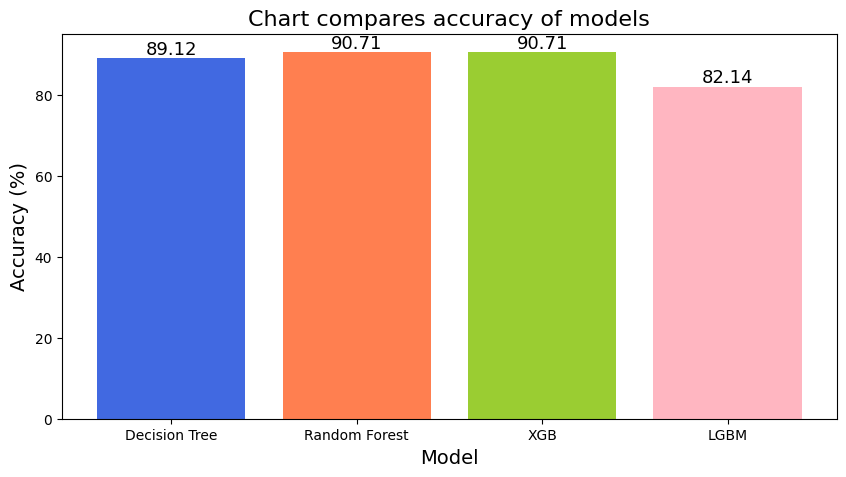

In [38]:
accuracy_score_sm = [acc_dt, acc_rf, acc_xgb, acc_lgbm ]
model = ["Decision Tree","Random Forest","XGB","LGBM"]
accuracy_score_sm = [round(x * 100,2) for x in accuracy_score_sm]

plt.figure(figsize=(10,5))
palette = ['royalblue','coral','yellowgreen','lightpink','goldenrod','rebeccapurple']
plt.bar(model,accuracy_score_sm, color = palette)
for i, v in enumerate(accuracy_score_sm):
    plt.text(i, v+1, str(v), ha='center', fontsize=13)


plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Chart compares accuracy of models", fontsize=16)
plt.show()


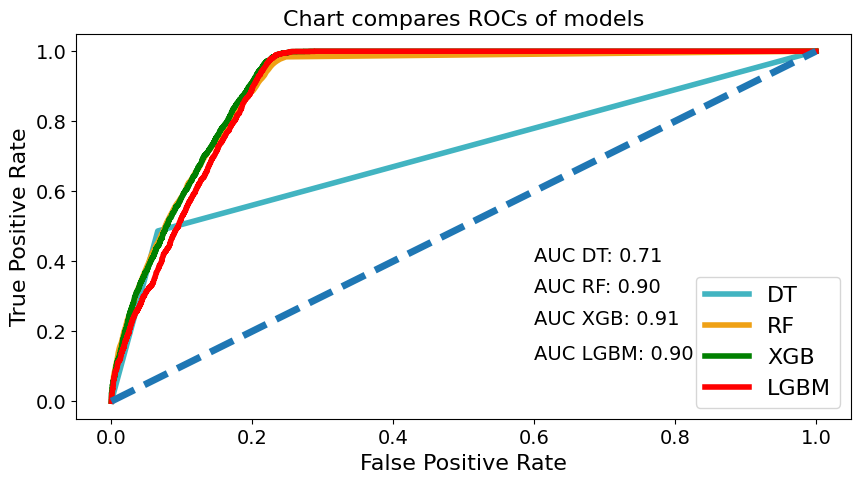

In [39]:
from sklearn.metrics import roc_auc_score,roc_curve
#set up plotting area
#plt.figure(0).clf()
plt.figure(figsize=(10,5))
#Vẽ ROC của mô hình đầu tiên
y_probabilities = model_dt.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='#42b4c1')
plt.text(0.6,0.4,'AUC DT: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 14)
#Vẽ ROC của mô hình thứ 2
y_probabilities_2 = model_rf.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_2)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='#efa115')
plt.text(0.6,0.31,'AUC RF: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_2)),size= 14)
#Vẽ ROC của mô hình thứ 3
y_probabilities_3 = model_xgb.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_3)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='green')
plt.text(0.6,0.22,'AUC XGB: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_3)),size= 14)
#Vẽ ROC của mô hình thứ 4
y_probabilities_4 = model_lgbm.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_4)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
plt.text(0.6,0.12,'AUC LGBM: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_4)),size= 14)


plt.plot([0,1],ls='--',linewidth=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Chart compares ROCs of models', fontsize=16)
plt.legend(['DT', 'RF', 'XGB', 'LGBM'], fontsize=16 )

In [40]:
#NEARMISS
from imblearn.under_sampling import NearMiss
model_miss=NearMiss(version=3)
X_miss,y_miss=model_miss.fit_resample(X_train,y_train)
X_miss_scale,y_miss_scale=model_miss.fit_resample(X_train_scale,y_train)
print(X_miss.shape,y_miss.shape)

(11612, 2) (11612,)


In [41]:
#LogisticRegression
model_lg=LogisticRegression()
model_lg.fit(X_miss_scale,y_miss_scale)
y_pred_test=model_lg.predict(X_test)
score=classification_report(y_test,y_pred_test)
print(score)
acc_lg=accuracy_score(y_test,y_pred_test)

              precision    recall  f1-score   support

       False       0.90      1.00      0.95     24177
        True       0.00      0.00      0.00      2568

    accuracy                           0.90     26745
   macro avg       0.45      0.50      0.47     26745
weighted avg       0.82      0.90      0.86     26745



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [42]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_miss,y_miss)
y_pred_test=model_rf.predict(X_test)
y_pred_train=model_rf.predict(X_miss)
score_test=classification_report(y_test,y_pred_test)
score_train=classification_report(y_miss,y_pred_train)

print('test',score_test,'\ntrain',score_train)
roc_auc_score_rf=(y_test,y_pred_test)
acc_rf=accuracy_score(y_test,y_pred_test)

test               precision    recall  f1-score   support

       False       0.98      0.81      0.89     24177
        True       0.33      0.84      0.47      2568

    accuracy                           0.82     26745
   macro avg       0.65      0.83      0.68     26745
weighted avg       0.92      0.82      0.85     26745
 
train               precision    recall  f1-score   support

       False       1.00      1.00      1.00      5806
        True       1.00      1.00      1.00      5806

    accuracy                           1.00     11612
   macro avg       1.00      1.00      1.00     11612
weighted avg       1.00      1.00      1.00     11612



In [43]:
#DecisionTree

model_dt=DecisionTreeClassifier()
model_dt.fit(X_miss,y_miss)
y_pred_test=model_dt.predict(X_test)
y_pred_train=model_dt.predict(X_miss)
score_test=classification_report(y_test,y_pred_test)
score_train=classification_report(y_miss,y_pred_train)
auc=roc_auc_score(y_test,y_pred_test)
print('test',score_test,'\ntrain',score_train)
roc_auc_score_dt=(y_test,y_pred_test)
acc_dt=accuracy_score(y_test,y_pred_test)

test               precision    recall  f1-score   support

       False       0.97      0.83      0.89     24177
        True       0.32      0.77      0.45      2568

    accuracy                           0.82     26745
   macro avg       0.65      0.80      0.67     26745
weighted avg       0.91      0.82      0.85     26745
 
train               precision    recall  f1-score   support

       False       1.00      1.00      1.00      5806
        True       1.00      1.00      1.00      5806

    accuracy                           1.00     11612
   macro avg       1.00      1.00      1.00     11612
weighted avg       1.00      1.00      1.00     11612



In [44]:
#XGB
model_xgb=XGBClassifier()
model_xgb.fit(X_miss,y_miss)
y_pred_test=model_xgb.predict(X_test)
y_pred_train=model_xgb.predict(X_miss)

auc=roc_auc_score(y_test,y_pred_test)

score_train=classification_report(y_miss,y_pred_train)
print('test',score_test,'\ntrain',score_train)
roc_auc_score_xgb=(y_test,y_pred_test)
acc_xgb=accuracy_score(y_test,y_pred_test)

test               precision    recall  f1-score   support

       False       0.97      0.83      0.89     24177
        True       0.32      0.77      0.45      2568

    accuracy                           0.82     26745
   macro avg       0.65      0.80      0.67     26745
weighted avg       0.91      0.82      0.85     26745
 
train               precision    recall  f1-score   support

       False       0.96      0.78      0.86      5806
        True       0.82      0.97      0.89      5806

    accuracy                           0.88     11612
   macro avg       0.89      0.88      0.87     11612
weighted avg       0.89      0.88      0.87     11612



In [45]:
#LGBM
model_lgbm=LGBMClassifier()
model_lgbm.fit(X_miss,y_miss)
y_pred_test=model_lgbm.predict(X_test)
y_pred_train=model_lgbm.predict(X_miss)
score_test=classification_report(y_test,y_pred_test)
score_train=classification_report(y_miss,y_pred_train)
print('test',score_test,'\ntrain',score_train)
roc_auc_score_lgbm=(y_test,y_pred_test)
acc_lgbm=accuracy_score(y_test,y_pred_test)

[LightGBM] [Info] Number of positive: 5806, number of negative: 5806
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11612, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
test               precision    recall  f1-score   support

       False       0.99      0.78      0.87     24177
        True       0.31      0.93      0.47      2568

    accuracy                           0.80     26745
   macro avg       0.65      0.85      0.67     26745
weighted avg       0.92      0.80      0.84     26745
 
train               precision    recall  f1-score   support

       False       0.94      0.74      0.83      5806
        True       0.78      0.95      0.86      5806

    accuracy                           0.84     11612
   ma

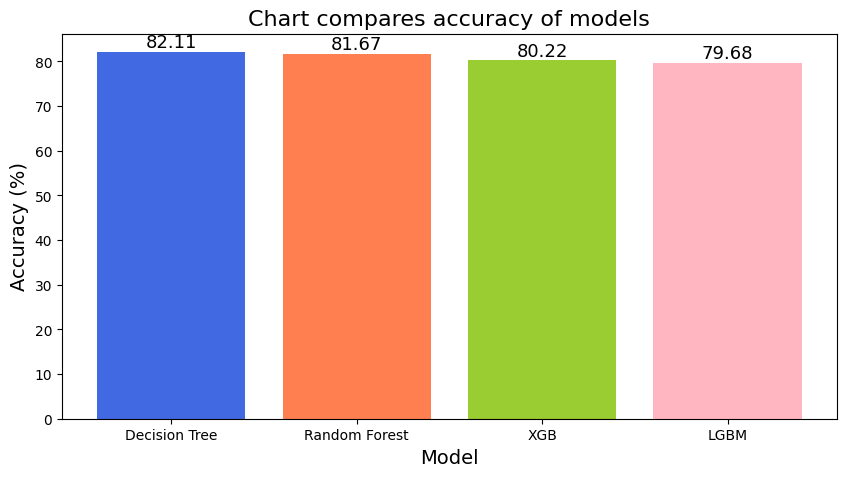

In [46]:
accuracy_score_miss = [acc_dt, acc_rf, acc_xgb, acc_lgbm ]
model = ["Decision Tree","Random Forest","XGB","LGBM"]
accuracy_score_miss = [round(x * 100,2) for x in accuracy_score_miss]

plt.figure(figsize=(10,5))
palette = ['royalblue','coral','yellowgreen','lightpink','goldenrod','rebeccapurple']
plt.bar(model,accuracy_score_miss, color = palette)
for i, v in enumerate(accuracy_score_miss):
    plt.text(i, v+1, str(v), ha='center', fontsize=13)


plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Chart compares accuracy of models", fontsize=16)
plt.show()


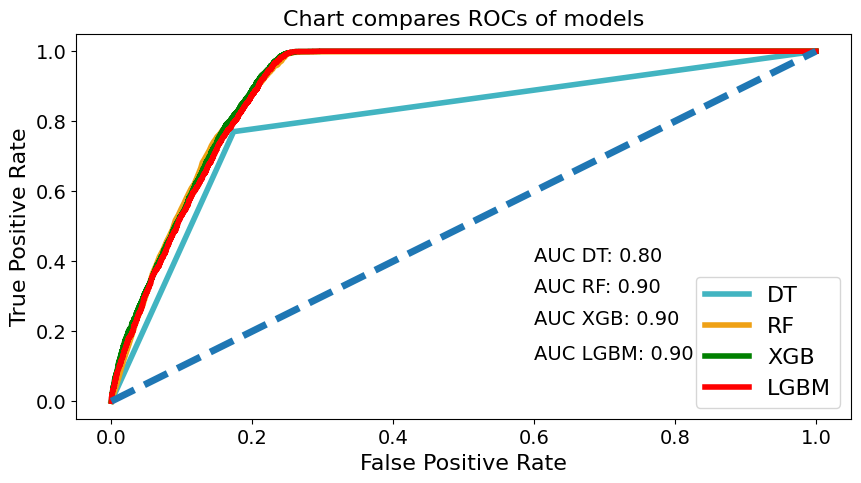

In [47]:
from sklearn.metrics import roc_auc_score,roc_curve
#set up plotting area
#plt.figure(0).clf()
plt.figure(figsize=(10,5))
#Vẽ ROC của mô hình đầu tiên
y_probabilities = model_dt.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='#42b4c1')
plt.text(0.6,0.4,'AUC DT: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 14)
#Vẽ ROC của mô hình thứ 2
y_probabilities_2 = model_rf.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_2)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='#efa115')
plt.text(0.6,0.31,'AUC RF: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_2)),size= 14)
#Vẽ ROC của mô hình thứ 3
y_probabilities_3 = model_xgb.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_3)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='green')
plt.text(0.6,0.22,'AUC XGB: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_3)),size= 14)
#Vẽ ROC của mô hình thứ 4
y_probabilities_4 = model_lgbm.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_4)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
plt.text(0.6,0.12,'AUC LGBM: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_4)),size= 14)
#Vẽ ROC của mô hình thứ 5
#y_probabilities_1 = SVC.predict_proba(X_test)[:,-1]
#false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_1)
#plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='purple')
#plt.text(0.6,0.02,'AUC SVC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_1)),size= 16)
#format
plt.plot([0,1],ls='--',linewidth=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Chart compares ROCs of models', fontsize=16)
plt.legend(['DT', 'RF', 'XGB', 'LGBM'], fontsize=16 )

###Tuning


In [48]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators':list(range(10,100)),
        'max_depth':list(range(1,10))}
grid=GridSearchCV(model_rf,params)
grid.fit(X_miss,y_miss)
print(grid.best_params_)

{'max_depth': 2, 'n_estimators': 79}


In [64]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=79,max_depth=2)
model_rf.fit(X_miss,y_miss)
y_pred_test=model_rf.predict(X_test)
y_pred_train=model_rf.predict(X_miss)
score_test=classification_report(y_test,y_pred_test)
score_train=classification_report(y_miss,y_pred_train)
auc=roc_auc_score(y_test,y_pred_test)
print('test',score_test,'\ntrain',score_train)
roc_auc_score_rf=(y_test,y_pred_test)
acc_rf=accuracy_score(y_test,y_pred_test)

test               precision    recall  f1-score   support

       False       1.00      0.76      0.86     24177
        True       0.30      0.99      0.46      2568

    accuracy                           0.78     26745
   macro avg       0.65      0.87      0.66     26745
weighted avg       0.93      0.78      0.82     26745
 
train               precision    recall  f1-score   support

       False       0.99      0.62      0.76      5806
        True       0.73      0.99      0.84      5806

    accuracy                           0.81     11612
   macro avg       0.86      0.81      0.80     11612
weighted avg       0.86      0.81      0.80     11612



In [50]:
#DecisionTree
from sklearn.model_selection import GridSearchCV
params={
        'max_depth':list(range(1,100))}
grid=GridSearchCV(model_dt,params)
grid.fit(X_miss,y_miss)
print(grid.best_params_)

{'max_depth': 1}


In [51]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(max_depth=1)
model_dt.fit(X_miss,y_miss)
y_pred_test=model_dt.predict(X_test)
y_pred_train=model_dt.predict(X_miss)
score_test=classification_report(y_test,y_pred_test)
score_train=classification_report(y_miss,y_pred_train)
auc=roc_auc_score(y_test,y_pred_test)
print('test',score_test,'\ntrain',score_train)
roc_auc_score_dt=(y_test,y_pred_test)
acc_dt=accuracy_score(y_test,y_pred_test)

test               precision    recall  f1-score   support

       False       1.00      0.76      0.86     24177
        True       0.30      0.99      0.46      2568

    accuracy                           0.78     26745
   macro avg       0.65      0.87      0.66     26745
weighted avg       0.93      0.78      0.82     26745
 
train               precision    recall  f1-score   support

       False       0.99      0.62      0.76      5806
        True       0.73      0.99      0.84      5806

    accuracy                           0.81     11612
   macro avg       0.86      0.81      0.80     11612
weighted avg       0.86      0.81      0.80     11612



In [52]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.5 MB/s eta 0:00:00


In [53]:
#XGB
from xgboost.callback import EarlyStopping
import optuna
from sklearn.metrics import f1_score
def objective(trial,data=X_miss,target=y_miss):
  train_X,test_X,train_y,test_y=train_test_split(data,target,random_state=43,test_size=0.15)
  param={
      'learning_rate': trial.suggest_categorical('learning_rate',[0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.1, 0.2]),
      'max_depth': trial.suggest_categorical('max_depth',list(range(1,100)))
  }
  model=XGBClassifier(**param)
  model.fit(train_X,train_y,eval_set=[(test_X,test_y)],early_stopping_rounds=100)
  preds=model.predict(test_X)
  f1score=f1_score(test_y,preds)
  return f1score
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=30)
print('best trial: ', study.best_trial.params)

[I 2023-09-17 04:14:59,474] A new study created in memory with name: no-name-233f45e9-25dd-49ce-9f5a-56a599140500
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68722
[1]	validation_0-logloss:0.68152
[2]	validation_0-logloss:0.67594
[3]	validation_0-logloss:0.67048
[4]	validation_0-logloss:0.66511
[5]	validation_0-logloss:0.65985
[6]	validation_0-logloss:0.65478
[7]	validation_0-logloss:0.64988
[8]	validation_0-logloss:0.64501
[9]	validation_0-logloss:0.64026
[10]	validation_0-logloss:0.63570
[11]	validation_0-logloss:0.63111
[12]	validation_0-logloss:0.62666
[13]	validation_0-logloss:0.62229
[14]	validation_0-logloss:0.61813
[15]	validation_0-logloss:0.61394
[16]	validation_0-logloss:0.60989
[17]	validation_0-logloss:0.60594
[18]	validation_0-logloss:0.60200
[19]	validation_0-logloss:0.59821
[20]	validation_0-logloss:0.59448
[21]	validation_0-logloss:0.59089
[22]	validation_0-logloss:0.58734
[23]	validation_0-logloss:0.58390
[24]	validation_0-logloss:0.58060
[25]	validation_0-logloss:0.57723
[26]	validation_0-logloss:0.57405
[27]	validation_0-logloss:0.57082
[28]	validation_0-logloss:0.56771
[29]	validation_0-loglos

[I 2023-09-17 04:15:03,144] Trial 0 finished with value: 0.8194965184788431 and parameters: {'learning_rate': 0.012, 'max_depth': 76}. Best is trial 0 with value: 0.8194965184788431.


[0]	validation_0-logloss:0.64620
[1]	validation_0-logloss:0.60919
[2]	validation_0-logloss:0.57760
[3]	validation_0-logloss:0.55106
[4]	validation_0-logloss:0.52961
[5]	validation_0-logloss:0.51111
[6]	validation_0-logloss:0.49487
[7]	validation_0-logloss:0.48154
[8]	validation_0-logloss:0.46972
[9]	validation_0-logloss:0.45969


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.45079
[11]	validation_0-logloss:0.44320
[12]	validation_0-logloss:0.43751
[13]	validation_0-logloss:0.43280
[14]	validation_0-logloss:0.42853
[15]	validation_0-logloss:0.42520
[16]	validation_0-logloss:0.42169
[17]	validation_0-logloss:0.41918
[18]	validation_0-logloss:0.41708
[19]	validation_0-logloss:0.41543
[20]	validation_0-logloss:0.41362
[21]	validation_0-logloss:0.41200
[22]	validation_0-logloss:0.41125
[23]	validation_0-logloss:0.41039
[24]	validation_0-logloss:0.40993
[25]	validation_0-logloss:0.40873
[26]	validation_0-logloss:0.40834
[27]	validation_0-logloss:0.40793
[28]	validation_0-logloss:0.40819
[29]	validation_0-logloss:0.40838
[30]	validation_0-logloss:0.40836
[31]	validation_0-logloss:0.40937
[32]	validation_0-logloss:0.40995
[33]	validation_0-logloss:0.41047
[34]	validation_0-logloss:0.41105
[35]	validation_0-logloss:0.41119
[36]	validation_0-logloss:0.41199
[37]	validation_0-logloss:0.41281
[38]	validation_0-logloss:0.41344
[39]	validatio

[I 2023-09-17 04:15:28,284] Trial 1 finished with value: 0.8165038002171553 and parameters: {'learning_rate': 0.1, 'max_depth': 95}. Best is trial 0 with value: 0.8194965184788431.


[0]	validation_0-logloss:0.68820
[1]	validation_0-logloss:0.68342
[2]	validation_0-logloss:0.67874
[3]	validation_0-logloss:0.67408
[4]	validation_0-logloss:0.66957
[5]	validation_0-logloss:0.66512
[6]	validation_0-logloss:0.66074
[7]	validation_0-logloss:0.65647
[8]	validation_0-logloss:0.65231
[9]	validation_0-logloss:0.64829
[10]	validation_0-logloss:0.64425


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.64030
[12]	validation_0-logloss:0.63646
[13]	validation_0-logloss:0.63261
[14]	validation_0-logloss:0.62888
[15]	validation_0-logloss:0.62520
[16]	validation_0-logloss:0.62164
[17]	validation_0-logloss:0.61811
[18]	validation_0-logloss:0.61462
[19]	validation_0-logloss:0.61127
[20]	validation_0-logloss:0.60791
[21]	validation_0-logloss:0.60462
[22]	validation_0-logloss:0.60140
[23]	validation_0-logloss:0.59823
[24]	validation_0-logloss:0.59514
[25]	validation_0-logloss:0.59218
[26]	validation_0-logloss:0.58919
[27]	validation_0-logloss:0.58629
[28]	validation_0-logloss:0.58341
[29]	validation_0-logloss:0.58060
[30]	validation_0-logloss:0.57785
[31]	validation_0-logloss:0.57513
[32]	validation_0-logloss:0.57249
[33]	validation_0-logloss:0.56981
[34]	validation_0-logloss:0.56726
[35]	validation_0-logloss:0.56466
[36]	validation_0-logloss:0.56207
[37]	validation_0-logloss:0.55950
[38]	validation_0-logloss:0.55711
[39]	validation_0-logloss:0.55464
[40]	validatio

[I 2023-09-17 04:15:30,143] Trial 2 finished with value: 0.8208955223880596 and parameters: {'learning_rate': 0.01, 'max_depth': 30}. Best is trial 2 with value: 0.8208955223880596.


[0]	validation_0-logloss:0.68919
[1]	validation_0-logloss:0.68534
[2]	validation_0-logloss:0.68156
[3]	validation_0-logloss:0.67778
[4]	validation_0-logloss:0.67411
[5]	validation_0-logloss:0.67049
[6]	validation_0-logloss:0.66690
[7]	validation_0-logloss:0.66340
[8]	validation_0-logloss:0.65994
[9]	validation_0-logloss:0.65652
[10]	validation_0-logloss:0.65318
[11]	validation_0-logloss:0.64992


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.64663
[13]	validation_0-logloss:0.64344
[14]	validation_0-logloss:0.64032
[15]	validation_0-logloss:0.63722
[16]	validation_0-logloss:0.63413
[17]	validation_0-logloss:0.63111
[18]	validation_0-logloss:0.62815
[19]	validation_0-logloss:0.62525
[20]	validation_0-logloss:0.62238
[21]	validation_0-logloss:0.61951
[22]	validation_0-logloss:0.61677
[23]	validation_0-logloss:0.61397
[24]	validation_0-logloss:0.61125
[25]	validation_0-logloss:0.60857
[26]	validation_0-logloss:0.60596
[27]	validation_0-logloss:0.60337
[28]	validation_0-logloss:0.60078
[29]	validation_0-logloss:0.59825
[30]	validation_0-logloss:0.59575
[31]	validation_0-logloss:0.59333
[32]	validation_0-logloss:0.59094
[33]	validation_0-logloss:0.58859
[34]	validation_0-logloss:0.58627
[35]	validation_0-logloss:0.58397
[36]	validation_0-logloss:0.58170
[37]	validation_0-logloss:0.57946
[38]	validation_0-logloss:0.57723
[39]	validation_0-logloss:0.57507
[40]	validation_0-logloss:0.57297
[41]	validatio

[I 2023-09-17 04:15:31,987] Trial 3 finished with value: 0.8187134502923976 and parameters: {'learning_rate': 0.008, 'max_depth': 86}. Best is trial 2 with value: 0.8208955223880596.


[0]	validation_0-logloss:0.68624
[1]	validation_0-logloss:0.67962
[2]	validation_0-logloss:0.67317
[3]	validation_0-logloss:0.66687
[4]	validation_0-logloss:0.66071
[5]	validation_0-logloss:0.65471
[6]	validation_0-logloss:0.64903
[7]	validation_0-logloss:0.64337
[8]	validation_0-logloss:0.63787
[9]	validation_0-logloss:0.63262
[10]	validation_0-logloss:0.62736


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.62223
[12]	validation_0-logloss:0.61732
[13]	validation_0-logloss:0.61253
[14]	validation_0-logloss:0.60785
[15]	validation_0-logloss:0.60325
[16]	validation_0-logloss:0.59875
[17]	validation_0-logloss:0.59441
[18]	validation_0-logloss:0.59031
[19]	validation_0-logloss:0.58627
[20]	validation_0-logloss:0.58221
[21]	validation_0-logloss:0.57827
[22]	validation_0-logloss:0.57451
[23]	validation_0-logloss:0.57075
[24]	validation_0-logloss:0.56716
[25]	validation_0-logloss:0.56361
[26]	validation_0-logloss:0.56001
[27]	validation_0-logloss:0.55650
[28]	validation_0-logloss:0.55326
[29]	validation_0-logloss:0.54989
[30]	validation_0-logloss:0.54656
[31]	validation_0-logloss:0.54343
[32]	validation_0-logloss:0.54036
[33]	validation_0-logloss:0.53739
[34]	validation_0-logloss:0.53438
[35]	validation_0-logloss:0.53150
[36]	validation_0-logloss:0.52867
[37]	validation_0-logloss:0.52593
[38]	validation_0-logloss:0.52329
[39]	validation_0-logloss:0.52066
[40]	validatio

[I 2023-09-17 04:15:34,035] Trial 4 finished with value: 0.8194965184788431 and parameters: {'learning_rate': 0.014, 'max_depth': 48}. Best is trial 2 with value: 0.8208955223880596.


[0]	validation_0-logloss:0.68429
[1]	validation_0-logloss:0.67587
[2]	validation_0-logloss:0.66768
[3]	validation_0-logloss:0.65981
[4]	validation_0-logloss:0.65217
[5]	validation_0-logloss:0.64494
[6]	validation_0-logloss:0.63774
[7]	validation_0-logloss:0.63087
[8]	validation_0-logloss:0.62429
[9]	validation_0-logloss:0.61798


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.61172
[11]	validation_0-logloss:0.60571
[12]	validation_0-logloss:0.60001
[13]	validation_0-logloss:0.59436
[14]	validation_0-logloss:0.58888
[15]	validation_0-logloss:0.58366
[16]	validation_0-logloss:0.57864
[17]	validation_0-logloss:0.57381
[18]	validation_0-logloss:0.56903
[19]	validation_0-logloss:0.56452
[20]	validation_0-logloss:0.55996
[21]	validation_0-logloss:0.55548
[22]	validation_0-logloss:0.55109
[23]	validation_0-logloss:0.54703
[24]	validation_0-logloss:0.54290
[25]	validation_0-logloss:0.53900
[26]	validation_0-logloss:0.53525
[27]	validation_0-logloss:0.53144
[28]	validation_0-logloss:0.52786
[29]	validation_0-logloss:0.52441
[30]	validation_0-logloss:0.52104
[31]	validation_0-logloss:0.51770
[32]	validation_0-logloss:0.51451
[33]	validation_0-logloss:0.51138
[34]	validation_0-logloss:0.50834
[35]	validation_0-logloss:0.50552
[36]	validation_0-logloss:0.50272
[37]	validation_0-logloss:0.49996
[38]	validation_0-logloss:0.49717
[39]	validatio

[I 2023-09-17 04:15:37,423] Trial 5 finished with value: 0.8204851752021562 and parameters: {'learning_rate': 0.018, 'max_depth': 87}. Best is trial 2 with value: 0.8208955223880596.


[0]	validation_0-logloss:0.68331
[1]	validation_0-logloss:0.67390
[2]	validation_0-logloss:0.66491
[3]	validation_0-logloss:0.65626
[4]	validation_0-logloss:0.64800
[5]	validation_0-logloss:0.64008
[6]	validation_0-logloss:0.63234
[7]	validation_0-logloss:0.62493
[8]	validation_0-logloss:0.61789
[9]	validation_0-logloss:0.61100
[10]	validation_0-logloss:0.60435
[11]	validation_0-logloss:0.59802
[12]	validation_0-logloss:0.59188
[13]	validation_0-logloss:0.58593
[14]	validation_0-logloss:0.58018
[15]	validation_0-logloss:0.57462


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.56923
[17]	validation_0-logloss:0.56401
[18]	validation_0-logloss:0.55904
[19]	validation_0-logloss:0.55418
[20]	validation_0-logloss:0.54951
[21]	validation_0-logloss:0.54494
[22]	validation_0-logloss:0.54057
[23]	validation_0-logloss:0.53632
[24]	validation_0-logloss:0.53218
[25]	validation_0-logloss:0.52824
[26]	validation_0-logloss:0.52433
[27]	validation_0-logloss:0.52061
[28]	validation_0-logloss:0.51699
[29]	validation_0-logloss:0.51350
[30]	validation_0-logloss:0.51014
[31]	validation_0-logloss:0.50694
[32]	validation_0-logloss:0.50376
[33]	validation_0-logloss:0.50062
[34]	validation_0-logloss:0.49757
[35]	validation_0-logloss:0.49472
[36]	validation_0-logloss:0.49182
[37]	validation_0-logloss:0.48896
[38]	validation_0-logloss:0.48628
[39]	validation_0-logloss:0.48365
[40]	validation_0-logloss:0.48109
[41]	validation_0-logloss:0.47854
[42]	validation_0-logloss:0.47611
[43]	validation_0-logloss:0.47370
[44]	validation_0-logloss:0.47145
[45]	validatio

[I 2023-09-17 04:15:38,608] Trial 6 finished with value: 0.8283038501560874 and parameters: {'learning_rate': 0.02, 'max_depth': 12}. Best is trial 6 with value: 0.8283038501560874.


[0]	validation_0-logloss:0.68919
[1]	validation_0-logloss:0.68534
[2]	validation_0-logloss:0.68156
[3]	validation_0-logloss:0.67778
[4]	validation_0-logloss:0.67411
[5]	validation_0-logloss:0.67049
[6]	validation_0-logloss:0.66690
[7]	validation_0-logloss:0.66340
[8]	validation_0-logloss:0.65994
[9]	validation_0-logloss:0.65652
[10]	validation_0-logloss:0.65318
[11]	validation_0-logloss:0.64992


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.64663
[13]	validation_0-logloss:0.64344
[14]	validation_0-logloss:0.64032
[15]	validation_0-logloss:0.63722
[16]	validation_0-logloss:0.63413
[17]	validation_0-logloss:0.63111
[18]	validation_0-logloss:0.62815
[19]	validation_0-logloss:0.62525
[20]	validation_0-logloss:0.62238
[21]	validation_0-logloss:0.61951
[22]	validation_0-logloss:0.61677
[23]	validation_0-logloss:0.61397
[24]	validation_0-logloss:0.61125
[25]	validation_0-logloss:0.60857
[26]	validation_0-logloss:0.60596
[27]	validation_0-logloss:0.60337
[28]	validation_0-logloss:0.60078
[29]	validation_0-logloss:0.59825
[30]	validation_0-logloss:0.59575
[31]	validation_0-logloss:0.59333
[32]	validation_0-logloss:0.59094
[33]	validation_0-logloss:0.58859
[34]	validation_0-logloss:0.58627
[35]	validation_0-logloss:0.58397
[36]	validation_0-logloss:0.58170
[37]	validation_0-logloss:0.57946
[38]	validation_0-logloss:0.57723
[39]	validation_0-logloss:0.57507
[40]	validation_0-logloss:0.57297
[41]	validatio

[I 2023-09-17 04:15:40,457] Trial 7 finished with value: 0.8187134502923976 and parameters: {'learning_rate': 0.008, 'max_depth': 96}. Best is trial 6 with value: 0.8283038501560874.


[0]	validation_0-logloss:0.68820
[1]	validation_0-logloss:0.68342
[2]	validation_0-logloss:0.67874
[3]	validation_0-logloss:0.67408
[4]	validation_0-logloss:0.66957
[5]	validation_0-logloss:0.66512
[6]	validation_0-logloss:0.66074
[7]	validation_0-logloss:0.65647
[8]	validation_0-logloss:0.65231
[9]	validation_0-logloss:0.64829
[10]	validation_0-logloss:0.64425
[11]	validation_0-logloss:0.64030


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.63646
[13]	validation_0-logloss:0.63261
[14]	validation_0-logloss:0.62888
[15]	validation_0-logloss:0.62520
[16]	validation_0-logloss:0.62164
[17]	validation_0-logloss:0.61811
[18]	validation_0-logloss:0.61462
[19]	validation_0-logloss:0.61127
[20]	validation_0-logloss:0.60791
[21]	validation_0-logloss:0.60462
[22]	validation_0-logloss:0.60140
[23]	validation_0-logloss:0.59823
[24]	validation_0-logloss:0.59514
[25]	validation_0-logloss:0.59218
[26]	validation_0-logloss:0.58919
[27]	validation_0-logloss:0.58629
[28]	validation_0-logloss:0.58341
[29]	validation_0-logloss:0.58060
[30]	validation_0-logloss:0.57785
[31]	validation_0-logloss:0.57513
[32]	validation_0-logloss:0.57249
[33]	validation_0-logloss:0.56981
[34]	validation_0-logloss:0.56726
[35]	validation_0-logloss:0.56466
[36]	validation_0-logloss:0.56207
[37]	validation_0-logloss:0.55950
[38]	validation_0-logloss:0.55711
[39]	validation_0-logloss:0.55464
[40]	validation_0-logloss:0.55224
[41]	validatio

[I 2023-09-17 04:15:42,375] Trial 8 finished with value: 0.8162393162393162 and parameters: {'learning_rate': 0.01, 'max_depth': 74}. Best is trial 6 with value: 0.8283038501560874.


[0]	validation_0-logloss:0.64620
[1]	validation_0-logloss:0.60919
[2]	validation_0-logloss:0.57760
[3]	validation_0-logloss:0.55106
[4]	validation_0-logloss:0.52961
[5]	validation_0-logloss:0.51111
[6]	validation_0-logloss:0.49487
[7]	validation_0-logloss:0.48154
[8]	validation_0-logloss:0.46972
[9]	validation_0-logloss:0.45969


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.45079
[11]	validation_0-logloss:0.44320
[12]	validation_0-logloss:0.43751
[13]	validation_0-logloss:0.43280
[14]	validation_0-logloss:0.42853
[15]	validation_0-logloss:0.42520
[16]	validation_0-logloss:0.42169
[17]	validation_0-logloss:0.41918
[18]	validation_0-logloss:0.41697
[19]	validation_0-logloss:0.41532
[20]	validation_0-logloss:0.41345
[21]	validation_0-logloss:0.41155
[22]	validation_0-logloss:0.41030
[23]	validation_0-logloss:0.40963
[24]	validation_0-logloss:0.40928
[25]	validation_0-logloss:0.40790
[26]	validation_0-logloss:0.40719
[27]	validation_0-logloss:0.40703
[28]	validation_0-logloss:0.40696
[29]	validation_0-logloss:0.40721
[30]	validation_0-logloss:0.40706
[31]	validation_0-logloss:0.40728
[32]	validation_0-logloss:0.40797
[33]	validation_0-logloss:0.40875
[34]	validation_0-logloss:0.40899
[35]	validation_0-logloss:0.40919
[36]	validation_0-logloss:0.40925
[37]	validation_0-logloss:0.40958
[38]	validation_0-logloss:0.41017
[39]	validatio

[I 2023-09-17 04:15:45,596] Trial 9 finished with value: 0.8180336773492667 and parameters: {'learning_rate': 0.1, 'max_depth': 68}. Best is trial 6 with value: 0.8283038501560874.


[0]	validation_0-logloss:0.68331
[1]	validation_0-logloss:0.67401
[2]	validation_0-logloss:0.66500
[3]	validation_0-logloss:0.65637
[4]	validation_0-logloss:0.64816
[5]	validation_0-logloss:0.64012
[6]	validation_0-logloss:0.63232
[7]	validation_0-logloss:0.62494
[8]	validation_0-logloss:0.61786
[9]	validation_0-logloss:0.61096
[10]	validation_0-logloss:0.60428


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.59790
[12]	validation_0-logloss:0.59186
[13]	validation_0-logloss:0.58600
[14]	validation_0-logloss:0.58028
[15]	validation_0-logloss:0.57485
[16]	validation_0-logloss:0.56948
[17]	validation_0-logloss:0.56441
[18]	validation_0-logloss:0.55933
[19]	validation_0-logloss:0.55437
[20]	validation_0-logloss:0.54952
[21]	validation_0-logloss:0.54486
[22]	validation_0-logloss:0.54044
[23]	validation_0-logloss:0.53615
[24]	validation_0-logloss:0.53202
[25]	validation_0-logloss:0.52804
[26]	validation_0-logloss:0.52414
[27]	validation_0-logloss:0.52039
[28]	validation_0-logloss:0.51671
[29]	validation_0-logloss:0.51323
[30]	validation_0-logloss:0.50990
[31]	validation_0-logloss:0.50659
[32]	validation_0-logloss:0.50336
[33]	validation_0-logloss:0.50024
[34]	validation_0-logloss:0.49732
[35]	validation_0-logloss:0.49447
[36]	validation_0-logloss:0.49160
[37]	validation_0-logloss:0.48891
[38]	validation_0-logloss:0.48622
[39]	validation_0-logloss:0.48364
[40]	validatio

[I 2023-09-17 04:15:49,066] Trial 10 finished with value: 0.8174474959612278 and parameters: {'learning_rate': 0.02, 'max_depth': 88}. Best is trial 6 with value: 0.8283038501560874.


[0]	validation_0-logloss:0.68331
[1]	validation_0-logloss:0.67390
[2]	validation_0-logloss:0.66491
[3]	validation_0-logloss:0.65626
[4]	validation_0-logloss:0.64800
[5]	validation_0-logloss:0.64008
[6]	validation_0-logloss:0.63234
[7]	validation_0-logloss:0.62493
[8]	validation_0-logloss:0.61789
[9]	validation_0-logloss:0.61100
[10]	validation_0-logloss:0.60435
[11]	validation_0-logloss:0.59802
[12]	validation_0-logloss:0.59188
[13]	validation_0-logloss:0.58593
[14]	validation_0-logloss:0.58018
[15]	validation_0-logloss:0.57462


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.56923
[17]	validation_0-logloss:0.56401
[18]	validation_0-logloss:0.55904
[19]	validation_0-logloss:0.55418
[20]	validation_0-logloss:0.54951
[21]	validation_0-logloss:0.54494
[22]	validation_0-logloss:0.54057
[23]	validation_0-logloss:0.53632
[24]	validation_0-logloss:0.53218
[25]	validation_0-logloss:0.52824
[26]	validation_0-logloss:0.52433
[27]	validation_0-logloss:0.52061
[28]	validation_0-logloss:0.51699
[29]	validation_0-logloss:0.51350
[30]	validation_0-logloss:0.51014
[31]	validation_0-logloss:0.50694
[32]	validation_0-logloss:0.50376
[33]	validation_0-logloss:0.50062
[34]	validation_0-logloss:0.49757
[35]	validation_0-logloss:0.49472
[36]	validation_0-logloss:0.49182
[37]	validation_0-logloss:0.48896
[38]	validation_0-logloss:0.48628
[39]	validation_0-logloss:0.48365
[40]	validation_0-logloss:0.48109
[41]	validation_0-logloss:0.47854
[42]	validation_0-logloss:0.47611
[43]	validation_0-logloss:0.47370
[44]	validation_0-logloss:0.47145
[45]	validatio

[I 2023-09-17 04:15:50,257] Trial 11 finished with value: 0.8283038501560874 and parameters: {'learning_rate': 0.02, 'max_depth': 12}. Best is trial 6 with value: 0.8283038501560874.


[0]	validation_0-logloss:0.68331
[1]	validation_0-logloss:0.67390
[2]	validation_0-logloss:0.66491
[3]	validation_0-logloss:0.65626
[4]	validation_0-logloss:0.64800
[5]	validation_0-logloss:0.64008
[6]	validation_0-logloss:0.63234
[7]	validation_0-logloss:0.62493
[8]	validation_0-logloss:0.61789
[9]	validation_0-logloss:0.61100
[10]	validation_0-logloss:0.60435
[11]	validation_0-logloss:0.59802
[12]	validation_0-logloss:0.59188
[13]	validation_0-logloss:0.58593


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.58018
[15]	validation_0-logloss:0.57462
[16]	validation_0-logloss:0.56923
[17]	validation_0-logloss:0.56401
[18]	validation_0-logloss:0.55904
[19]	validation_0-logloss:0.55418
[20]	validation_0-logloss:0.54951
[21]	validation_0-logloss:0.54494
[22]	validation_0-logloss:0.54057
[23]	validation_0-logloss:0.53632
[24]	validation_0-logloss:0.53218
[25]	validation_0-logloss:0.52824
[26]	validation_0-logloss:0.52433
[27]	validation_0-logloss:0.52061
[28]	validation_0-logloss:0.51699
[29]	validation_0-logloss:0.51350
[30]	validation_0-logloss:0.51014
[31]	validation_0-logloss:0.50694
[32]	validation_0-logloss:0.50376
[33]	validation_0-logloss:0.50062
[34]	validation_0-logloss:0.49757
[35]	validation_0-logloss:0.49472
[36]	validation_0-logloss:0.49182
[37]	validation_0-logloss:0.48896
[38]	validation_0-logloss:0.48628
[39]	validation_0-logloss:0.48365
[40]	validation_0-logloss:0.48109
[41]	validation_0-logloss:0.47854
[42]	validation_0-logloss:0.47611
[43]	validatio

[I 2023-09-17 04:15:51,507] Trial 12 finished with value: 0.8283038501560874 and parameters: {'learning_rate': 0.02, 'max_depth': 12}. Best is trial 6 with value: 0.8283038501560874.


[0]	validation_0-logloss:0.68331
[1]	validation_0-logloss:0.67390
[2]	validation_0-logloss:0.66491
[3]	validation_0-logloss:0.65626
[4]	validation_0-logloss:0.64800
[5]	validation_0-logloss:0.64008
[6]	validation_0-logloss:0.63234
[7]	validation_0-logloss:0.62493
[8]	validation_0-logloss:0.61789
[9]	validation_0-logloss:0.61100
[10]	validation_0-logloss:0.60435
[11]	validation_0-logloss:0.59802
[12]	validation_0-logloss:0.59188
[13]	validation_0-logloss:0.58593
[14]	validation_0-logloss:0.58018


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.57462
[16]	validation_0-logloss:0.56923
[17]	validation_0-logloss:0.56401
[18]	validation_0-logloss:0.55904
[19]	validation_0-logloss:0.55418
[20]	validation_0-logloss:0.54951
[21]	validation_0-logloss:0.54494
[22]	validation_0-logloss:0.54057
[23]	validation_0-logloss:0.53632
[24]	validation_0-logloss:0.53218
[25]	validation_0-logloss:0.52824
[26]	validation_0-logloss:0.52433
[27]	validation_0-logloss:0.52061
[28]	validation_0-logloss:0.51699
[29]	validation_0-logloss:0.51350
[30]	validation_0-logloss:0.51014
[31]	validation_0-logloss:0.50694
[32]	validation_0-logloss:0.50376
[33]	validation_0-logloss:0.50062
[34]	validation_0-logloss:0.49757
[35]	validation_0-logloss:0.49472
[36]	validation_0-logloss:0.49182
[37]	validation_0-logloss:0.48896
[38]	validation_0-logloss:0.48628
[39]	validation_0-logloss:0.48365
[40]	validation_0-logloss:0.48109
[41]	validation_0-logloss:0.47854
[42]	validation_0-logloss:0.47611
[43]	validation_0-logloss:0.47370
[44]	validatio

[I 2023-09-17 04:15:52,754] Trial 13 finished with value: 0.8283038501560874 and parameters: {'learning_rate': 0.02, 'max_depth': 12}. Best is trial 6 with value: 0.8283038501560874.


[0]	validation_0-logloss:0.68527
[1]	validation_0-logloss:0.67778
[2]	validation_0-logloss:0.67042
[3]	validation_0-logloss:0.66341
[4]	validation_0-logloss:0.65655
[5]	validation_0-logloss:0.64997
[6]	validation_0-logloss:0.64348
[7]	validation_0-logloss:0.63728
[8]	validation_0-logloss:0.63125
[9]	validation_0-logloss:0.62535
[10]	validation_0-logloss:0.61963
[11]	validation_0-logloss:0.61407
[12]	validation_0-logloss:0.60868
[13]	validation_0-logloss:0.60346
[14]	validation_0-logloss:0.59836
[15]	validation_0-logloss:0.59343
[16]	validation_0-logloss:0.58861
[17]	validation_0-logloss:0.58394


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.57938
[19]	validation_0-logloss:0.57495
[20]	validation_0-logloss:0.57066
[21]	validation_0-logloss:0.56642
[22]	validation_0-logloss:0.56231
[23]	validation_0-logloss:0.55834
[24]	validation_0-logloss:0.55447
[25]	validation_0-logloss:0.55074
[26]	validation_0-logloss:0.54707
[27]	validation_0-logloss:0.54347
[28]	validation_0-logloss:0.53995
[29]	validation_0-logloss:0.53657
[30]	validation_0-logloss:0.53324
[31]	validation_0-logloss:0.53006
[32]	validation_0-logloss:0.52694
[33]	validation_0-logloss:0.52385
[34]	validation_0-logloss:0.52086
[35]	validation_0-logloss:0.51795
[36]	validation_0-logloss:0.51513
[37]	validation_0-logloss:0.51236
[38]	validation_0-logloss:0.50973
[39]	validation_0-logloss:0.50704
[40]	validation_0-logloss:0.50447
[41]	validation_0-logloss:0.50188
[42]	validation_0-logloss:0.49937
[43]	validation_0-logloss:0.49693
[44]	validation_0-logloss:0.49450
[45]	validation_0-logloss:0.49218
[46]	validation_0-logloss:0.48992
[47]	validatio

[I 2023-09-17 04:15:53,876] Trial 14 finished with value: 0.829117191533299 and parameters: {'learning_rate': 0.016, 'max_depth': 10}. Best is trial 14 with value: 0.829117191533299.


[0]	validation_0-logloss:0.68526
[1]	validation_0-logloss:0.67774
[2]	validation_0-logloss:0.67040
[3]	validation_0-logloss:0.66331
[4]	validation_0-logloss:0.65650
[5]	validation_0-logloss:0.64976
[6]	validation_0-logloss:0.64341
[7]	validation_0-logloss:0.63705
[8]	validation_0-logloss:0.63100
[9]	validation_0-logloss:0.62514


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.61943
[11]	validation_0-logloss:0.61379
[12]	validation_0-logloss:0.60837
[13]	validation_0-logloss:0.60319
[14]	validation_0-logloss:0.59811
[15]	validation_0-logloss:0.59318
[16]	validation_0-logloss:0.58840
[17]	validation_0-logloss:0.58390
[18]	validation_0-logloss:0.57941
[19]	validation_0-logloss:0.57494
[20]	validation_0-logloss:0.57076
[21]	validation_0-logloss:0.56656
[22]	validation_0-logloss:0.56240
[23]	validation_0-logloss:0.55835
[24]	validation_0-logloss:0.55462
[25]	validation_0-logloss:0.55074
[26]	validation_0-logloss:0.54691
[27]	validation_0-logloss:0.54334
[28]	validation_0-logloss:0.53983
[29]	validation_0-logloss:0.53633
[30]	validation_0-logloss:0.53302
[31]	validation_0-logloss:0.52979
[32]	validation_0-logloss:0.52668
[33]	validation_0-logloss:0.52362
[34]	validation_0-logloss:0.52061
[35]	validation_0-logloss:0.51773
[36]	validation_0-logloss:0.51488
[37]	validation_0-logloss:0.51213
[38]	validation_0-logloss:0.50950
[39]	validatio

[I 2023-09-17 04:15:56,017] Trial 15 finished with value: 0.8187197417966648 and parameters: {'learning_rate': 0.016, 'max_depth': 91}. Best is trial 14 with value: 0.829117191533299.


[0]	validation_0-logloss:0.60476
[1]	validation_0-logloss:0.54775
[2]	validation_0-logloss:0.50618
[3]	validation_0-logloss:0.47754
[4]	validation_0-logloss:0.45623
[5]	validation_0-logloss:0.44353
[6]	validation_0-logloss:0.43098
[7]	validation_0-logloss:0.42319
[8]	validation_0-logloss:0.41707


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.41195
[10]	validation_0-logloss:0.40895
[11]	validation_0-logloss:0.40795
[12]	validation_0-logloss:0.40807
[13]	validation_0-logloss:0.40862
[14]	validation_0-logloss:0.40993
[15]	validation_0-logloss:0.40961
[16]	validation_0-logloss:0.41016
[17]	validation_0-logloss:0.41147
[18]	validation_0-logloss:0.41241
[19]	validation_0-logloss:0.41516
[20]	validation_0-logloss:0.41577
[21]	validation_0-logloss:0.41688
[22]	validation_0-logloss:0.41830
[23]	validation_0-logloss:0.41955
[24]	validation_0-logloss:0.42037
[25]	validation_0-logloss:0.42133
[26]	validation_0-logloss:0.42134
[27]	validation_0-logloss:0.42259
[28]	validation_0-logloss:0.42276
[29]	validation_0-logloss:0.42402
[30]	validation_0-logloss:0.42422
[31]	validation_0-logloss:0.42562
[32]	validation_0-logloss:0.42706
[33]	validation_0-logloss:0.42831
[34]	validation_0-logloss:0.42946
[35]	validation_0-logloss:0.42952
[36]	validation_0-logloss:0.43057
[37]	validation_0-logloss:0.43311
[38]	validation

[I 2023-09-17 04:16:00,394] Trial 16 finished with value: 0.8229561451001625 and parameters: {'learning_rate': 0.2, 'max_depth': 54}. Best is trial 14 with value: 0.829117191533299.


[0]	validation_0-logloss:0.68526
[1]	validation_0-logloss:0.67774
[2]	validation_0-logloss:0.67040
[3]	validation_0-logloss:0.66331
[4]	validation_0-logloss:0.65650
[5]	validation_0-logloss:0.64976
[6]	validation_0-logloss:0.64341
[7]	validation_0-logloss:0.63705
[8]	validation_0-logloss:0.63100
[9]	validation_0-logloss:0.62514
[10]	validation_0-logloss:0.61943


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.61379
[12]	validation_0-logloss:0.60837
[13]	validation_0-logloss:0.60319
[14]	validation_0-logloss:0.59811
[15]	validation_0-logloss:0.59318
[16]	validation_0-logloss:0.58840
[17]	validation_0-logloss:0.58390
[18]	validation_0-logloss:0.57941
[19]	validation_0-logloss:0.57494
[20]	validation_0-logloss:0.57076
[21]	validation_0-logloss:0.56656
[22]	validation_0-logloss:0.56240
[23]	validation_0-logloss:0.55835
[24]	validation_0-logloss:0.55462
[25]	validation_0-logloss:0.55074
[26]	validation_0-logloss:0.54691
[27]	validation_0-logloss:0.54334
[28]	validation_0-logloss:0.53983
[29]	validation_0-logloss:0.53633
[30]	validation_0-logloss:0.53302
[31]	validation_0-logloss:0.52979
[32]	validation_0-logloss:0.52668
[33]	validation_0-logloss:0.52362
[34]	validation_0-logloss:0.52061
[35]	validation_0-logloss:0.51773
[36]	validation_0-logloss:0.51488
[37]	validation_0-logloss:0.51213
[38]	validation_0-logloss:0.50950
[39]	validation_0-logloss:0.50693
[40]	validatio

[I 2023-09-17 04:16:02,543] Trial 17 finished with value: 0.8210639441160666 and parameters: {'learning_rate': 0.016, 'max_depth': 47}. Best is trial 14 with value: 0.829117191533299.


[0]	validation_0-logloss:0.68526
[1]	validation_0-logloss:0.67774
[2]	validation_0-logloss:0.67040
[3]	validation_0-logloss:0.66331
[4]	validation_0-logloss:0.65650
[5]	validation_0-logloss:0.64976
[6]	validation_0-logloss:0.64341
[7]	validation_0-logloss:0.63705
[8]	validation_0-logloss:0.63100
[9]	validation_0-logloss:0.62514
[10]	validation_0-logloss:0.61943


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.61379
[12]	validation_0-logloss:0.60837
[13]	validation_0-logloss:0.60319
[14]	validation_0-logloss:0.59811
[15]	validation_0-logloss:0.59318
[16]	validation_0-logloss:0.58840
[17]	validation_0-logloss:0.58390
[18]	validation_0-logloss:0.57941
[19]	validation_0-logloss:0.57494
[20]	validation_0-logloss:0.57076
[21]	validation_0-logloss:0.56656
[22]	validation_0-logloss:0.56240
[23]	validation_0-logloss:0.55835
[24]	validation_0-logloss:0.55462
[25]	validation_0-logloss:0.55074
[26]	validation_0-logloss:0.54691
[27]	validation_0-logloss:0.54334
[28]	validation_0-logloss:0.53983
[29]	validation_0-logloss:0.53633
[30]	validation_0-logloss:0.53302
[31]	validation_0-logloss:0.52979
[32]	validation_0-logloss:0.52668
[33]	validation_0-logloss:0.52362
[34]	validation_0-logloss:0.52061
[35]	validation_0-logloss:0.51773
[36]	validation_0-logloss:0.51488
[37]	validation_0-logloss:0.51213
[38]	validation_0-logloss:0.50950
[39]	validation_0-logloss:0.50693
[40]	validatio

[I 2023-09-17 04:16:04,647] Trial 18 finished with value: 0.8187197417966648 and parameters: {'learning_rate': 0.016, 'max_depth': 84}. Best is trial 14 with value: 0.829117191533299.


[0]	validation_0-logloss:0.68624
[1]	validation_0-logloss:0.67963
[2]	validation_0-logloss:0.67319
[3]	validation_0-logloss:0.66691
[4]	validation_0-logloss:0.66075
[5]	validation_0-logloss:0.65474
[6]	validation_0-logloss:0.64905
[7]	validation_0-logloss:0.64339
[8]	validation_0-logloss:0.63787
[9]	validation_0-logloss:0.63264
[10]	validation_0-logloss:0.62738
[11]	validation_0-logloss:0.62223


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.61730
[13]	validation_0-logloss:0.61256
[14]	validation_0-logloss:0.60782
[15]	validation_0-logloss:0.60323
[16]	validation_0-logloss:0.59877
[17]	validation_0-logloss:0.59441
[18]	validation_0-logloss:0.59029
[19]	validation_0-logloss:0.58621
[20]	validation_0-logloss:0.58213
[21]	validation_0-logloss:0.57823
[22]	validation_0-logloss:0.57451
[23]	validation_0-logloss:0.57073
[24]	validation_0-logloss:0.56712
[25]	validation_0-logloss:0.56356
[26]	validation_0-logloss:0.55998
[27]	validation_0-logloss:0.55661
[28]	validation_0-logloss:0.55316
[29]	validation_0-logloss:0.54978
[30]	validation_0-logloss:0.54655
[31]	validation_0-logloss:0.54337
[32]	validation_0-logloss:0.54030
[33]	validation_0-logloss:0.53725
[34]	validation_0-logloss:0.53429
[35]	validation_0-logloss:0.53135
[36]	validation_0-logloss:0.52855
[37]	validation_0-logloss:0.52579
[38]	validation_0-logloss:0.52310
[39]	validation_0-logloss:0.52051
[40]	validation_0-logloss:0.51798
[41]	validatio

[I 2023-09-17 04:16:06,435] Trial 19 finished with value: 0.8232161874334398 and parameters: {'learning_rate': 0.014, 'max_depth': 23}. Best is trial 14 with value: 0.829117191533299.


[0]	validation_0-logloss:0.60476
[1]	validation_0-logloss:0.54775
[2]	validation_0-logloss:0.50618
[3]	validation_0-logloss:0.47754
[4]	validation_0-logloss:0.45623
[5]	validation_0-logloss:0.44353
[6]	validation_0-logloss:0.43098
[7]	validation_0-logloss:0.42319
[8]	validation_0-logloss:0.41707


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.41193
[10]	validation_0-logloss:0.40950
[11]	validation_0-logloss:0.40807
[12]	validation_0-logloss:0.40841
[13]	validation_0-logloss:0.41076
[14]	validation_0-logloss:0.41205
[15]	validation_0-logloss:0.41279
[16]	validation_0-logloss:0.41327
[17]	validation_0-logloss:0.41408
[18]	validation_0-logloss:0.41511
[19]	validation_0-logloss:0.41722
[20]	validation_0-logloss:0.41989
[21]	validation_0-logloss:0.42118
[22]	validation_0-logloss:0.42278
[23]	validation_0-logloss:0.42450
[24]	validation_0-logloss:0.42643
[25]	validation_0-logloss:0.42896
[26]	validation_0-logloss:0.43108
[27]	validation_0-logloss:0.43235
[28]	validation_0-logloss:0.43423
[29]	validation_0-logloss:0.43570
[30]	validation_0-logloss:0.43699
[31]	validation_0-logloss:0.43816
[32]	validation_0-logloss:0.43986
[33]	validation_0-logloss:0.44079
[34]	validation_0-logloss:0.44286
[35]	validation_0-logloss:0.44388
[36]	validation_0-logloss:0.44574
[37]	validation_0-logloss:0.44699
[38]	validation

[I 2023-09-17 04:16:11,717] Trial 20 finished with value: 0.8199026500811248 and parameters: {'learning_rate': 0.2, 'max_depth': 83}. Best is trial 14 with value: 0.829117191533299.


[0]	validation_0-logloss:0.68331
[1]	validation_0-logloss:0.67401
[2]	validation_0-logloss:0.66500
[3]	validation_0-logloss:0.65637
[4]	validation_0-logloss:0.64816
[5]	validation_0-logloss:0.64012
[6]	validation_0-logloss:0.63232
[7]	validation_0-logloss:0.62494
[8]	validation_0-logloss:0.61786
[9]	validation_0-logloss:0.61096


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.60428
[11]	validation_0-logloss:0.59790
[12]	validation_0-logloss:0.59186
[13]	validation_0-logloss:0.58600
[14]	validation_0-logloss:0.58028
[15]	validation_0-logloss:0.57485
[16]	validation_0-logloss:0.56948
[17]	validation_0-logloss:0.56441
[18]	validation_0-logloss:0.55933
[19]	validation_0-logloss:0.55437
[20]	validation_0-logloss:0.54952
[21]	validation_0-logloss:0.54486
[22]	validation_0-logloss:0.54044
[23]	validation_0-logloss:0.53615
[24]	validation_0-logloss:0.53205
[25]	validation_0-logloss:0.52800
[26]	validation_0-logloss:0.52409
[27]	validation_0-logloss:0.52027
[28]	validation_0-logloss:0.51662
[29]	validation_0-logloss:0.51309
[30]	validation_0-logloss:0.50975
[31]	validation_0-logloss:0.50646
[32]	validation_0-logloss:0.50325
[33]	validation_0-logloss:0.50014
[34]	validation_0-logloss:0.49714
[35]	validation_0-logloss:0.49434
[36]	validation_0-logloss:0.49139
[37]	validation_0-logloss:0.48855
[38]	validation_0-logloss:0.48598
[39]	validatio

[I 2023-09-17 04:16:13,826] Trial 21 finished with value: 0.8224 and parameters: {'learning_rate': 0.02, 'max_depth': 31}. Best is trial 14 with value: 0.829117191533299.


[0]	validation_0-logloss:0.68333
[1]	validation_0-logloss:0.67406
[2]	validation_0-logloss:0.66504
[3]	validation_0-logloss:0.65651
[4]	validation_0-logloss:0.64822
[5]	validation_0-logloss:0.64023
[6]	validation_0-logloss:0.63263
[7]	validation_0-logloss:0.62520
[8]	validation_0-logloss:0.61808
[9]	validation_0-logloss:0.61118
[10]	validation_0-logloss:0.60458
[11]	validation_0-logloss:0.59820
[12]	validation_0-logloss:0.59208
[13]	validation_0-logloss:0.58614
[14]	validation_0-logloss:0.58038
[15]	validation_0-logloss:0.57481


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.56937
[17]	validation_0-logloss:0.56422
[18]	validation_0-logloss:0.55927
[19]	validation_0-logloss:0.55432
[20]	validation_0-logloss:0.54971
[21]	validation_0-logloss:0.54512
[22]	validation_0-logloss:0.54070
[23]	validation_0-logloss:0.53641
[24]	validation_0-logloss:0.53229
[25]	validation_0-logloss:0.52829
[26]	validation_0-logloss:0.52447
[27]	validation_0-logloss:0.52078
[28]	validation_0-logloss:0.51703
[29]	validation_0-logloss:0.51350
[30]	validation_0-logloss:0.51012
[31]	validation_0-logloss:0.50676
[32]	validation_0-logloss:0.50350
[33]	validation_0-logloss:0.50033
[34]	validation_0-logloss:0.49729
[35]	validation_0-logloss:0.49430
[36]	validation_0-logloss:0.49144
[37]	validation_0-logloss:0.48861
[38]	validation_0-logloss:0.48588
[39]	validation_0-logloss:0.48320
[40]	validation_0-logloss:0.48055
[41]	validation_0-logloss:0.47795
[42]	validation_0-logloss:0.47551
[43]	validation_0-logloss:0.47308
[44]	validation_0-logloss:0.47076
[45]	validatio

[I 2023-09-17 04:16:15,003] Trial 22 finished with value: 0.831101956745623 and parameters: {'learning_rate': 0.02, 'max_depth': 10}. Best is trial 22 with value: 0.831101956745623.


[0]	validation_0-logloss:0.68430
[1]	validation_0-logloss:0.67591
[2]	validation_0-logloss:0.66772
[3]	validation_0-logloss:0.65994
[4]	validation_0-logloss:0.65235
[5]	validation_0-logloss:0.64512
[6]	validation_0-logloss:0.63801
[7]	validation_0-logloss:0.63117
[8]	validation_0-logloss:0.62459
[9]	validation_0-logloss:0.61817
[10]	validation_0-logloss:0.61196
[11]	validation_0-logloss:0.60601
[12]	validation_0-logloss:0.60019
[13]	validation_0-logloss:0.59459
[14]	validation_0-logloss:0.58915


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-logloss:0.58387
[16]	validation_0-logloss:0.57876
[17]	validation_0-logloss:0.57383
[18]	validation_0-logloss:0.56899
[19]	validation_0-logloss:0.56436
[20]	validation_0-logloss:0.55989
[21]	validation_0-logloss:0.55545
[22]	validation_0-logloss:0.55117
[23]	validation_0-logloss:0.54709
[24]	validation_0-logloss:0.54311
[25]	validation_0-logloss:0.53913
[26]	validation_0-logloss:0.53537
[27]	validation_0-logloss:0.53175
[28]	validation_0-logloss:0.52813
[29]	validation_0-logloss:0.52473
[30]	validation_0-logloss:0.52132
[31]	validation_0-logloss:0.51811
[32]	validation_0-logloss:0.51487
[33]	validation_0-logloss:0.51173
[34]	validation_0-logloss:0.50861
[35]	validation_0-logloss:0.50573
[36]	validation_0-logloss:0.50289
[37]	validation_0-logloss:0.50009
[38]	validation_0-logloss:0.49736
[39]	validation_0-logloss:0.49470
[40]	validation_0-logloss:0.49211
[41]	validation_0-logloss:0.48961
[42]	validation_0-logloss:0.48722
[43]	validation_0-logloss:0.48483
[44]	validatio

[I 2023-09-17 04:16:16,166] Trial 23 finished with value: 0.8297213622291023 and parameters: {'learning_rate': 0.018, 'max_depth': 10}. Best is trial 22 with value: 0.831101956745623.


[0]	validation_0-logloss:0.68427
[1]	validation_0-logloss:0.67587
[2]	validation_0-logloss:0.66753
[3]	validation_0-logloss:0.65970
[4]	validation_0-logloss:0.65214
[5]	validation_0-logloss:0.64484
[6]	validation_0-logloss:0.63770
[7]	validation_0-logloss:0.63091
[8]	validation_0-logloss:0.62435
[9]	validation_0-logloss:0.61801
[10]	validation_0-logloss:0.61172
[11]	validation_0-logloss:0.60568


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.59999
[13]	validation_0-logloss:0.59432
[14]	validation_0-logloss:0.58891
[15]	validation_0-logloss:0.58377
[16]	validation_0-logloss:0.57872
[17]	validation_0-logloss:0.57381
[18]	validation_0-logloss:0.56910
[19]	validation_0-logloss:0.56448
[20]	validation_0-logloss:0.56008
[21]	validation_0-logloss:0.55570
[22]	validation_0-logloss:0.55141
[23]	validation_0-logloss:0.54724
[24]	validation_0-logloss:0.54325
[25]	validation_0-logloss:0.53938
[26]	validation_0-logloss:0.53556
[27]	validation_0-logloss:0.53193
[28]	validation_0-logloss:0.52835
[29]	validation_0-logloss:0.52493
[30]	validation_0-logloss:0.52138
[31]	validation_0-logloss:0.51808
[32]	validation_0-logloss:0.51473
[33]	validation_0-logloss:0.51164
[34]	validation_0-logloss:0.50869
[35]	validation_0-logloss:0.50581
[36]	validation_0-logloss:0.50292
[37]	validation_0-logloss:0.50007
[38]	validation_0-logloss:0.49740
[39]	validation_0-logloss:0.49475
[40]	validation_0-logloss:0.49212
[41]	validatio

[I 2023-09-17 04:16:17,881] Trial 24 finished with value: 0.8237162519851774 and parameters: {'learning_rate': 0.018, 'max_depth': 19}. Best is trial 22 with value: 0.831101956745623.


[0]	validation_0-logloss:0.68430
[1]	validation_0-logloss:0.67591
[2]	validation_0-logloss:0.66772
[3]	validation_0-logloss:0.65994
[4]	validation_0-logloss:0.65235
[5]	validation_0-logloss:0.64512
[6]	validation_0-logloss:0.63801
[7]	validation_0-logloss:0.63117
[8]	validation_0-logloss:0.62459
[9]	validation_0-logloss:0.61817
[10]	validation_0-logloss:0.61196
[11]	validation_0-logloss:0.60601
[12]	validation_0-logloss:0.60019
[13]	validation_0-logloss:0.59459
[14]	validation_0-logloss:0.58915
[15]	validation_0-logloss:0.58387


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.57876
[17]	validation_0-logloss:0.57383
[18]	validation_0-logloss:0.56899
[19]	validation_0-logloss:0.56436
[20]	validation_0-logloss:0.55989
[21]	validation_0-logloss:0.55545
[22]	validation_0-logloss:0.55117
[23]	validation_0-logloss:0.54709
[24]	validation_0-logloss:0.54311
[25]	validation_0-logloss:0.53913
[26]	validation_0-logloss:0.53537
[27]	validation_0-logloss:0.53175
[28]	validation_0-logloss:0.52813
[29]	validation_0-logloss:0.52473
[30]	validation_0-logloss:0.52132
[31]	validation_0-logloss:0.51811
[32]	validation_0-logloss:0.51487
[33]	validation_0-logloss:0.51173
[34]	validation_0-logloss:0.50861
[35]	validation_0-logloss:0.50573
[36]	validation_0-logloss:0.50289
[37]	validation_0-logloss:0.50009
[38]	validation_0-logloss:0.49736
[39]	validation_0-logloss:0.49470
[40]	validation_0-logloss:0.49211
[41]	validation_0-logloss:0.48961
[42]	validation_0-logloss:0.48722
[43]	validation_0-logloss:0.48483
[44]	validation_0-logloss:0.48248
[45]	validatio

[I 2023-09-17 04:16:19,090] Trial 25 finished with value: 0.8297213622291023 and parameters: {'learning_rate': 0.018, 'max_depth': 10}. Best is trial 22 with value: 0.831101956745623.


[0]	validation_0-logloss:0.68429
[1]	validation_0-logloss:0.67587
[2]	validation_0-logloss:0.66768
[3]	validation_0-logloss:0.65981
[4]	validation_0-logloss:0.65217
[5]	validation_0-logloss:0.64494
[6]	validation_0-logloss:0.63774
[7]	validation_0-logloss:0.63087
[8]	validation_0-logloss:0.62429
[9]	validation_0-logloss:0.61798


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.61172
[11]	validation_0-logloss:0.60571
[12]	validation_0-logloss:0.60001
[13]	validation_0-logloss:0.59436
[14]	validation_0-logloss:0.58888
[15]	validation_0-logloss:0.58366
[16]	validation_0-logloss:0.57864
[17]	validation_0-logloss:0.57381
[18]	validation_0-logloss:0.56903
[19]	validation_0-logloss:0.56452
[20]	validation_0-logloss:0.55996
[21]	validation_0-logloss:0.55548
[22]	validation_0-logloss:0.55109
[23]	validation_0-logloss:0.54703
[24]	validation_0-logloss:0.54290
[25]	validation_0-logloss:0.53900
[26]	validation_0-logloss:0.53525
[27]	validation_0-logloss:0.53144
[28]	validation_0-logloss:0.52786
[29]	validation_0-logloss:0.52441
[30]	validation_0-logloss:0.52104
[31]	validation_0-logloss:0.51770
[32]	validation_0-logloss:0.51451
[33]	validation_0-logloss:0.51138
[34]	validation_0-logloss:0.50834
[35]	validation_0-logloss:0.50552
[36]	validation_0-logloss:0.50272
[37]	validation_0-logloss:0.49996
[38]	validation_0-logloss:0.49717
[39]	validatio

[I 2023-09-17 04:16:22,621] Trial 26 finished with value: 0.8204851752021562 and parameters: {'learning_rate': 0.018, 'max_depth': 97}. Best is trial 22 with value: 0.831101956745623.


[0]	validation_0-logloss:0.68430
[1]	validation_0-logloss:0.67591
[2]	validation_0-logloss:0.66772
[3]	validation_0-logloss:0.65994
[4]	validation_0-logloss:0.65235
[5]	validation_0-logloss:0.64512
[6]	validation_0-logloss:0.63801
[7]	validation_0-logloss:0.63117
[8]	validation_0-logloss:0.62459
[9]	validation_0-logloss:0.61817
[10]	validation_0-logloss:0.61196
[11]	validation_0-logloss:0.60601
[12]	validation_0-logloss:0.60019
[13]	validation_0-logloss:0.59459
[14]	validation_0-logloss:0.58915
[15]	validation_0-logloss:0.58387


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.57876
[17]	validation_0-logloss:0.57383
[18]	validation_0-logloss:0.56899
[19]	validation_0-logloss:0.56436
[20]	validation_0-logloss:0.55989
[21]	validation_0-logloss:0.55545
[22]	validation_0-logloss:0.55117
[23]	validation_0-logloss:0.54709
[24]	validation_0-logloss:0.54311
[25]	validation_0-logloss:0.53913
[26]	validation_0-logloss:0.53537
[27]	validation_0-logloss:0.53175
[28]	validation_0-logloss:0.52813
[29]	validation_0-logloss:0.52473
[30]	validation_0-logloss:0.52132
[31]	validation_0-logloss:0.51811
[32]	validation_0-logloss:0.51487
[33]	validation_0-logloss:0.51173
[34]	validation_0-logloss:0.50861
[35]	validation_0-logloss:0.50573
[36]	validation_0-logloss:0.50289
[37]	validation_0-logloss:0.50009
[38]	validation_0-logloss:0.49736
[39]	validation_0-logloss:0.49470
[40]	validation_0-logloss:0.49211
[41]	validation_0-logloss:0.48961
[42]	validation_0-logloss:0.48722
[43]	validation_0-logloss:0.48483
[44]	validation_0-logloss:0.48248
[45]	validatio

[I 2023-09-17 04:16:23,830] Trial 27 finished with value: 0.8297213622291023 and parameters: {'learning_rate': 0.018, 'max_depth': 10}. Best is trial 22 with value: 0.831101956745623.


[0]	validation_0-logloss:0.68429
[1]	validation_0-logloss:0.67587
[2]	validation_0-logloss:0.66768
[3]	validation_0-logloss:0.65979
[4]	validation_0-logloss:0.65214
[5]	validation_0-logloss:0.64492
[6]	validation_0-logloss:0.63772
[7]	validation_0-logloss:0.63085
[8]	validation_0-logloss:0.62427
[9]	validation_0-logloss:0.61795
[10]	validation_0-logloss:0.61169


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.60568
[12]	validation_0-logloss:0.59998
[13]	validation_0-logloss:0.59432
[14]	validation_0-logloss:0.58893
[15]	validation_0-logloss:0.58367
[16]	validation_0-logloss:0.57870
[17]	validation_0-logloss:0.57381
[18]	validation_0-logloss:0.56912
[19]	validation_0-logloss:0.56448
[20]	validation_0-logloss:0.55986
[21]	validation_0-logloss:0.55557
[22]	validation_0-logloss:0.55122
[23]	validation_0-logloss:0.54699
[24]	validation_0-logloss:0.54288
[25]	validation_0-logloss:0.53891
[26]	validation_0-logloss:0.53508
[27]	validation_0-logloss:0.53132
[28]	validation_0-logloss:0.52762
[29]	validation_0-logloss:0.52412
[30]	validation_0-logloss:0.52074
[31]	validation_0-logloss:0.51750
[32]	validation_0-logloss:0.51439
[33]	validation_0-logloss:0.51132
[34]	validation_0-logloss:0.50830
[35]	validation_0-logloss:0.50543
[36]	validation_0-logloss:0.50265
[37]	validation_0-logloss:0.49982
[38]	validation_0-logloss:0.49711
[39]	validation_0-logloss:0.49449
[40]	validatio

[I 2023-09-17 04:16:25,909] Trial 28 finished with value: 0.8232781633742658 and parameters: {'learning_rate': 0.018, 'max_depth': 27}. Best is trial 22 with value: 0.831101956745623.


[0]	validation_0-logloss:0.68722
[1]	validation_0-logloss:0.68152
[2]	validation_0-logloss:0.67594
[3]	validation_0-logloss:0.67048
[4]	validation_0-logloss:0.66511
[5]	validation_0-logloss:0.65985
[6]	validation_0-logloss:0.65478
[7]	validation_0-logloss:0.64988
[8]	validation_0-logloss:0.64501
[9]	validation_0-logloss:0.64026


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.63570
[11]	validation_0-logloss:0.63111
[12]	validation_0-logloss:0.62666
[13]	validation_0-logloss:0.62229
[14]	validation_0-logloss:0.61813
[15]	validation_0-logloss:0.61394
[16]	validation_0-logloss:0.60989
[17]	validation_0-logloss:0.60594
[18]	validation_0-logloss:0.60200
[19]	validation_0-logloss:0.59821
[20]	validation_0-logloss:0.59448
[21]	validation_0-logloss:0.59089
[22]	validation_0-logloss:0.58734
[23]	validation_0-logloss:0.58390
[24]	validation_0-logloss:0.58060
[25]	validation_0-logloss:0.57723
[26]	validation_0-logloss:0.57405
[27]	validation_0-logloss:0.57082
[28]	validation_0-logloss:0.56771
[29]	validation_0-logloss:0.56456
[30]	validation_0-logloss:0.56157
[31]	validation_0-logloss:0.55853
[32]	validation_0-logloss:0.55553
[33]	validation_0-logloss:0.55271
[34]	validation_0-logloss:0.54984
[35]	validation_0-logloss:0.54709
[36]	validation_0-logloss:0.54431
[37]	validation_0-logloss:0.54167
[38]	validation_0-logloss:0.53908
[39]	validatio

[I 2023-09-17 04:16:28,063] Trial 29 finished with value: 0.8194965184788431 and parameters: {'learning_rate': 0.012, 'max_depth': 59}. Best is trial 22 with value: 0.831101956745623.


best trial:  {'learning_rate': 0.02, 'max_depth': 10}


In [61]:
#XGB
from xgboost import XGBClassifier
model_xgb=XGBClassifier(learning_rate=0.02,
                        max_depth=10)
model_xgb.fit(X_miss,y_miss)
y_pred_test=model_xgb.predict(X_test)
y_pred_train=model_xgb.predict(X_miss)
score_test=classification_report(y_test,y_pred_test)
score_train=classification_report(y_miss,y_pred_train)
auc_test=roc_auc_score(y_test,y_pred_test)
auc_train=roc_auc_score(y_miss,y_pred_train)

print('test',score_test,'\ntrain',score_train)
roc_auc_score_xgb=(y_test,y_pred_test)
acc_xgb=accuracy_score(y_test,y_pred_test)

test               precision    recall  f1-score   support

       False       0.99      0.78      0.87     24177
        True       0.31      0.93      0.47      2568

    accuracy                           0.79     26745
   macro avg       0.65      0.86      0.67     26745
weighted avg       0.93      0.79      0.83     26745
 
train               precision    recall  f1-score   support

       False       0.96      0.75      0.84      5806
        True       0.79      0.97      0.87      5806

    accuracy                           0.86     11612
   macro avg       0.88      0.86      0.86     11612
weighted avg       0.88      0.86      0.86     11612



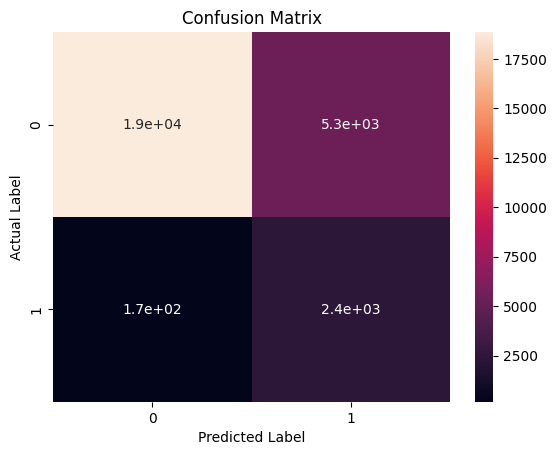

In [62]:
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
ax.set_title("Confusion Matrix")
plt.show()

In [56]:
#LGBM
def objective(trial, data = X_miss, target = y_miss):
  train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.15, random_state = 42)
  param = {
      "learning_rate": trial.suggest_categorical("learning_rate", [0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.1, 0.2]),
      "max_depth": trial.suggest_categorical("max_depth", [2,3,4,5,6,7,8]),
      "n_estimators": trial.suggest_categorical("n_estimators", list(range(10,100)))
  }
  model = LGBMClassifier(**param)
  model.fit(train_x, train_y,eval_set = [(test_x, test_y)])
  preds = model.predict(test_x)
  f1score = f1_score(test_y, preds)
  return f1score
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


[I 2023-09-17 04:16:28,820] A new study created in memory with name: no-name-26789edc-63ae-4b8b-af87-0f7173dc9eb2
[I 2023-09-17 04:16:29,017] Trial 0 finished with value: 0.8335046248715313 and parameters: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 97}. Best is trial 0 with value: 0.8335046248715313.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4948, number of negative: 4922
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 9870, number of used features: 2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501317 -> initscore=0.005269
[LightGBM] [Info] Start training from score 0.005269
[LightGBM] [Warning] Accuracy may be bad since you didn'

[I 2023-09-17 04:16:29,076] Trial 1 finished with value: 0.8371638141809291 and parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 61}. Best is trial 1 with value: 0.8371638141809291.
[I 2023-09-17 04:16:29,142] Trial 2 finished with value: 0.8333333333333334 and parameters: {'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 58}. Best is trial 1 with value: 0.8371638141809291.
[I 2023-09-17 04:16:29,195] Trial 3 finished with value: 0.8371638141809291 and parameters: {'learning_rate': 0.012, 'max_depth': 2, 'n_estimators': 78}. Best is trial 1 with value: 0.8371638141809291.


[LightGBM] [Info] Number of positive: 4948, number of negative: 4922
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 9870, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501317 -> initscore=0.005269
[LightGBM] [Info] Start training from score 0.005269
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4948, number of negative: 4922
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2023-09-17 04:16:29,262] Trial 4 finished with value: 0.834862385321101 and parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 86}. Best is trial 1 with value: 0.8371638141809291.
[I 2023-09-17 04:16:29,353] Trial 5 finished with value: 0.8304821150855365 and parameters: {'learning_rate': 0.008, 'max_depth': 7, 'n_estimators': 84}. Best is trial 1 with value: 0.8371638141809291.
[I 2023-09-17 04:16:29,386] Trial 6 finished with value: 0.8371638141809291 and parameters: {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 41}. Best is trial 1 with value: 0.8371638141809291.
[I 2023-09-17 04:16:29,426] Trial 7 finished with value: 0.8230322239830956 and parameters: {'learning_rate': 0.008, 'max_depth': 6, 'n_estimators': 20}. Best is trial 1 with value: 0.8371638141809291.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4948, number of negative: 4922
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 9870, number of used features: 2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501317 -> initscore=0.005269
[LightGBM] [Info] Start training from score 0.005269
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_le

[I 2023-09-17 04:16:29,510] Trial 8 finished with value: 0.8385469223007064 and parameters: {'learning_rate': 0.018, 'max_depth': 4, 'n_estimators': 68}. Best is trial 8 with value: 0.8385469223007064.
[I 2023-09-17 04:16:29,543] Trial 9 finished with value: 0.836858006042296 and parameters: {'learning_rate': 0.014, 'max_depth': 4, 'n_estimators': 16}. Best is trial 8 with value: 0.8385469223007064.
[I 2023-09-17 04:16:29,633] Trial 10 finished with value: 0.8385469223007064 and parameters: {'learning_rate': 0.018, 'max_depth': 4, 'n_estimators': 75}. Best is trial 8 with value: 0.8385469223007064.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-09-17 04:16:29,731] Trial 11 finished with value: 0.8385469223007064 and parameters: {'learning_rate': 0.018, 'max_depth': 4, 'n_estimators': 75}. Best is trial 8 with value: 0.8385469223007064.
[I 2023-09-17 04:16:29,821] Trial 12 finished with value: 0.8318766066838046 and parameters: {'learning_rate': 0.018, 'max_depth': 5, 'n_estimators': 68}. Best is trial 8 with value: 0.8385469223007064.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-09-17 04:16:29,882] Trial 13 finished with value: 0.8381240544629349 and parameters: {'learning_rate': 0.018, 'max_depth': 4, 'n_estimators': 43}. Best is trial 8 with value: 0.8385469223007064.
[I 2023-09-17 04:16:29,976] Trial 14 finished with value: 0.827873114924597 and parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 75}. Best is trial 8 with value: 0.8385469223007064.
[I 2023-09-17 04:16:30,051] Trial 15 finished with value: 0.8347915594441585 and parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 59}. Best is trial 8 with value: 0.8385469223007064.


[LightGBM] [Info] Number of positive: 4948, number of negative: 4922
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 9870, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501317 -> initscore=0.005269
[LightGBM] [Info] Start training from score 0.005269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2023-09-17 04:16:30,156] Trial 16 finished with value: 0.8336755646817249 and parameters: {'learning_rate': 0.016, 'max_depth': 5, 'n_estimators': 68}. Best is trial 8 with value: 0.8385469223007064.
[I 2023-09-17 04:16:30,243] Trial 17 finished with value: 0.8329896907216494 and parameters: {'learning_rate': 0.018, 'max_depth': 6, 'n_estimators': 79}. Best is trial 8 with value: 0.8385469223007064.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-09-17 04:16:30,349] Trial 18 finished with value: 0.8311822405782138 and parameters: {'learning_rate': 0.018, 'max_depth': 7, 'n_estimators': 92}. Best is trial 8 with value: 0.8385469223007064.
[I 2023-09-17 04:16:30,379] Trial 19 finished with value: 0.8402010050251256 and parameters: {'learning_rate': 0.014, 'max_depth': 3, 'n_estimators': 14}. Best is trial 19 with value: 0.8402010050251256.
[I 2023-09-17 04:16:30,407] Trial 20 finished with value: 0.8402010050251256 and parameters: {'learning_rate': 0.014, 'max_depth': 3, 'n_estimators': 14}. Best is trial 19 with value: 0.8402010050251256.
[I 2023-09-17 04:16:30,435] Trial 21 finished with value: 0.8402010050251256 and parameters: {'learning_rate': 0.014, 'max_depth': 3, 'n_estimators': 14}. Best is trial 19 with value: 0.8402010050251256.
[I 2023-09-17 04:16:30,463] Trial 22 finished with value: 0.8402010050251256 and parameters: {'learning_rate': 0.014, 'max_depth': 3, 'n_estimators': 14}. Best is trial 19 with value: 0

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4948, number of negative: 4922
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 9870, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501317 -> initscore=0.005269
[LightGBM] [Info] Start training from score 0.005269
[LightGBM] [Info] Number of positive: 4948, number of negative: 4922
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 9870, number of used features: 2
[LightGBM] [Info] [bin

[I 2023-09-17 04:16:30,560] Trial 25 finished with value: 0.8262910798122065 and parameters: {'learning_rate': 0.014, 'max_depth': 3, 'n_estimators': 12}. Best is trial 19 with value: 0.8402010050251256.
[I 2023-09-17 04:16:30,590] Trial 26 finished with value: 0.8402010050251256 and parameters: {'learning_rate': 0.014, 'max_depth': 3, 'n_estimators': 14}. Best is trial 19 with value: 0.8402010050251256.
[I 2023-09-17 04:16:30,620] Trial 27 finished with value: 0.8402010050251256 and parameters: {'learning_rate': 0.014, 'max_depth': 3, 'n_estimators': 14}. Best is trial 19 with value: 0.8402010050251256.
[I 2023-09-17 04:16:30,661] Trial 28 finished with value: 0.8326530612244897 and parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 28}. Best is trial 19 with value: 0.8402010050251256.
[I 2023-09-17 04:16:30,728] Trial 29 finished with value: 0.8310077519379845 and parameters: {'learning_rate': 0.012, 'max_depth': 8, 'n_estimators': 50}. Best is trial 19 with value: 0.

[LightGBM] [Info] Number of positive: 4948, number of negative: 4922
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 9870, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501317 -> initscore=0.005269
[LightGBM] [Info] Start training from score 0.005269
[LightGBM] [Info] Number of positive: 4948, number of negative: 4922
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 9870, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501317 -> initscore=0.005269
[LightGBM] [Info] Start training from score 0.005269
[LightGBM] [Info] Nu

In [63]:
#LGBM
model_lgbm=LGBMClassifier(learning_rate=0.014,
                          max_depth=3,
                          n_estimators=14)
model_lgbm.fit(X_miss,y_miss)
y_pred_test=model_lgbm.predict(X_test)
y_pred_train=model_lgbm.predict(X_miss)
score_test=classification_report(y_test,y_pred_test)
score_train=classification_report(y_miss,y_pred_train)
print('test',score_test,'\ntrain',score_train)
roc_auc_score_lgbm=(y_test,y_pred_test)
acc_lgbm=accuracy_score(y_test,y_pred_test)

[LightGBM] [Info] Number of positive: 5806, number of negative: 5806
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11612, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
test               precision    recall  f1-score   support

       False       0.99      0.77      0.87     24177
        True       0.30      0.95      0.46      2568

    accuracy                           0.78     26745
   macro avg       0.65      0.86      0.66     26745
weighted avg       0.93      0.78      0.83     26745
 
train               precision    recall  f1-score   support

       False       0.94      0.68      0.79      5806
        True       0.75      0.95      0.84      5806

    accuracy                           0.82     11612
   ma

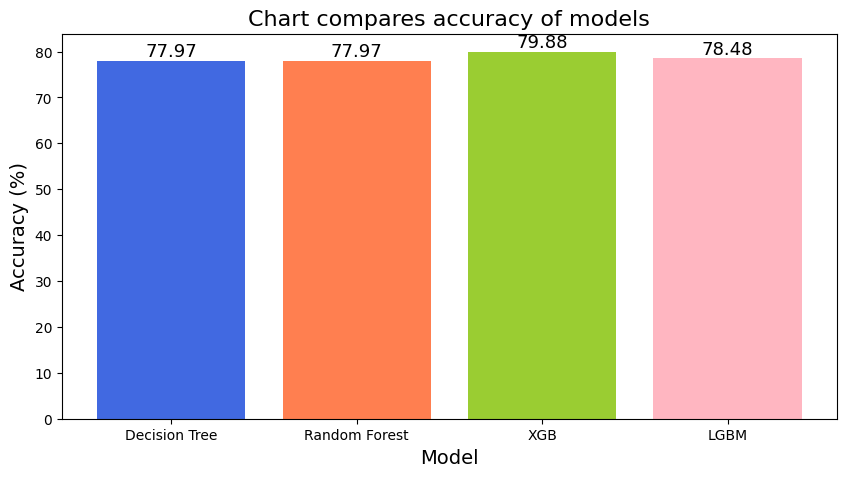

In [58]:
accuracy_score_tun= [acc_dt, acc_rf, acc_xgb, acc_lgbm ]
model = ["Decision Tree","Random Forest","XGB","LGBM"]
accuracy_score_tun = [round(x * 100,2) for x in accuracy_score_tun]# Nhân các giá trị của accuracy_score với 100 và làm tròn tới 2 số sau dấu phẩy

plt.figure(figsize=(10,5))
palette = ['royalblue','coral','yellowgreen','lightpink','goldenrod','rebeccapurple']
plt.bar(model,accuracy_score_tun, color = palette)
for i, v in enumerate(accuracy_score_tun):
    plt.text(i, v+1, str(v), ha='center', fontsize=13)


plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Chart compares accuracy of models", fontsize=16)
plt.show()


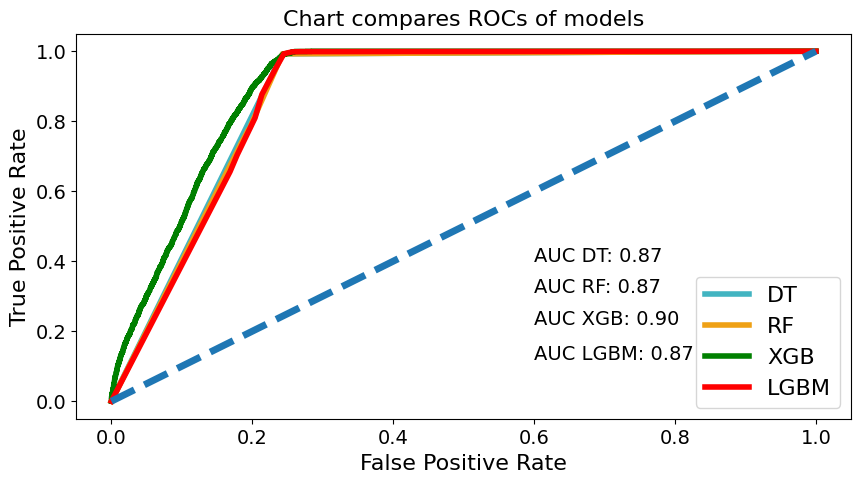

In [59]:
from sklearn.metrics import roc_auc_score,roc_curve
#set up plotting area
#plt.figure(0).clf()
plt.figure(figsize=(10,5))
#Vẽ ROC của mô hình đầu tiên
y_probabilities = model_dt.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='#42b4c1')
plt.text(0.6,0.4,'AUC DT: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 14)
#Vẽ ROC của mô hình thứ 2
y_probabilities_2 = model_rf.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_2)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='#efa115')
plt.text(0.6,0.31,'AUC RF: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_2)),size= 14)
#Vẽ ROC của mô hình thứ 3
y_probabilities_3 = model_xgb.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_3)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='green')
plt.text(0.6,0.22,'AUC XGB: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_3)),size= 14)
#Vẽ ROC của mô hình thứ 4
y_probabilities_4 = model_lgbm.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_4)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
plt.text(0.6,0.12,'AUC LGBM: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_4)),size= 14)
#Vẽ ROC của mô hình thứ 5
#y_probabilities_1 = SVC.predict_proba(X_test)[:,-1]
#false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities_1)
#plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='purple')
#plt.text(0.6,0.02,'AUC SVC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_1)),size= 16)
#format
plt.plot([0,1],ls='--',linewidth=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Chart compares ROCs of models', fontsize=16)
plt.legend(['DT', 'RF', 'XGB', 'LGBM'], fontsize=16 )